# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exploratory Data Analysis

The aim of this lecture is to perform an exploratory data analysis in order to extract some useful information hidden in data.

We are going to analyse the [IMDB movie dataset](https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv). In order to guide our analysis, we try to approach the problem by wondering some questions. The role of the analysis is to find the answers.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from string import punctuation
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})
%matplotlib inline
%config InlineBackend.figure_format = "retina"

#### Import data

Let's start by import movie dataset.

In [2]:
data_url = 'https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv'

df = pd.read_csv(data_url, parse_dates = True)

## General path

Here we describe a sort of general path. 

This must be considered more as a suggestion rather than a guideline to follow, as questions may change (and usually they do) according to data into account.

### Statistics

First, we consider the statistical properties of our data. For example, we calculate variables distributions, median, means, etc. 
In this phase one also evaluates whether is necessary to rescale values, to fill null values, etc.

### Plots

As the datasaurus dozen teaches us, we need to visualise data. In the beginning we start by plotting variables one against each other to explore correlations and dependencies. After we can go further to transform and regroup data to make more significant plots.


### Correlation analysis

Plots above should gave us some hints about correlations and interdependecies between data.

## Questions' Analysis

Let's begin our analysis by a description of the problem related to our dataset.

1. How much memory the dataset takes?
2. Are there some missing values?
3. Is it convenient to rename columns?
4. If missing values are there, how does one treat them?
5. Is it convenient to parse columns in the right data type?


These are general questions, let's go now to more dataset-related questions?

1. Can we create a column containing the number of actors who participated in the movie?
2. Can we study the difference of approval between critics and users?
3. Can we establish which director has directed more movies?
4. Can we establish which are the directors who have recorded the most box office?
5. What are the actors that took part in the most movies?
6. Can we select all movies within a genre (_e.g._ Sci-Fi) and analyze the annual trend in terms of quantity of movies produced, commercial success and appreciation?
7. Given a genre, can we get which terms have more occurrences in the description?

### The Analysis

We are going to answer the first set of questions by few lines of code, plus some additional consideration. 
With no further ado, we start coding.

In [3]:
# How much memory the dataset takes?
# Are there some missing values?

df.info(memory_usage='deep') # memory_usage parameter allows us to see the real memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 598.0 KB


Before going on, let's rename columns to work in a more comfortable way.

In [4]:
df = df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
})
df.columns = [col.lower() for col in df]
df

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


### Missing values
We have to decide how to treat missing values. First of all let's visualise them.

In [5]:
df[df.isna().any(axis=1)] # this prints all the rows with at least one NaN value

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0
989,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,52.07,NaN
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0


For the revenue, let's calculate the average revenue for each director individually and impute such value instead of `NaN`. This can be done by a `groupby`.

In [6]:
df.groupby('director').mean() # note that the mean skip NaN's by default. If a Director has only NaN values it returns NaN.

,rank,year,runtime,rating,votes,revenue_millions,metascore
director,,,,,,,
Aamir Khan,992.0,2007.00,165.00,8.50,102697.00,1.200,42.0
Abdellatif Kechiche,312.0,2013.00,180.00,7.80,103150.00,2.200,88.0
Adam Leon,784.0,2016.00,82.00,6.50,1031.00,NaN,77.0
Adam McKay,477.5,2009.75,110.75,7.00,201706.75,109.535,65.5
Adam Shankman,730.0,2009.50,120.00,6.30,83733.50,78.665,64.0
...,...,...,...,...,...,...,...
Xavier Dolan,794.0,2015.00,118.00,7.55,22109.00,3.490,61.0
Yimou Zhang,6.0,2016.00,103.00,6.10,56036.00,45.130,42.0
Yorgos Lanthimos,239.5,2012.00,106.50,7.20,86129.50,4.405,77.5


We have found the mean value for each director, but how to fill NaN with it? 

There is a method of `GroupByDataFrame` objects helping us, it is called `transform`.

In [7]:
df['revenue_millions'] = df.groupby('director').revenue_millions.transform(lambda x: x.fillna(x.mean()))

Some of the NaN's are still there, this because only one record was there with no information about the revenue (_e.g._ the director Billy Ray is present only in one movie).

In [8]:
df[df.director == "Billy Ray"]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0


We can drop these few genuine NaN values at this stage.

In [9]:
df = df.dropna(subset=['revenue_millions'])

We can adopt the same approach for `metascore`.

In [10]:
df['metascore'] = df.groupby('director').metascore.transform(lambda x: x.fillna(x.mean()))
df

/var/folders/cp/t4jts8hn71zbyy2j63hz8ywc0000gp/T/ipykernel_7062/2290907412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['metascore'] = df.groupby('director').metascore.transform(lambda x: x.fillna(x.mean()))


,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


We can now safely drop the remaining null values.

In [11]:
df = df.dropna()

Let's verify we do not have residual null values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              879 non-null    int64  
 1   title             879 non-null    object 
 2   genre             879 non-null    object 
 3   description       879 non-null    object 
 4   director          879 non-null    object 
 5   actors            879 non-null    object 
 6   year              879 non-null    int64  
 7   runtime           879 non-null    int64  
 8   rating            879 non-null    float64
 9   votes             879 non-null    int64  
 10  revenue_millions  879 non-null    float64
 11  metascore         879 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 89.3+ KB


### Auxiliary variables

In the set of questions we are asked to create a column counting the number of (relevant) actors in the movie or the difference between critics and users approval. These are an example of _auxiliary variable_ that might be correlated with some other dataset quantity.

#### Actors count

First of all, let's create a function counting the actors given a string listing them. Then we apply such a function to the `actors` column.

__Note__: One can be compact and do that also with an anonymous `lambda` function. 
We use an explicit function for the sake of clarity here.

In [13]:
def count_actors(actors):
    """count_actors function

    Args:
        actors (str): a string containing actors' names separated by comma.

    Returns:
        int: the number of actors named in the string.
    """
    actors = actors.replace(", ", ",").split(",")
    return len(actors)

In [14]:
# Create a column with the count 
df['actors_count'] = df['actors'].apply(count_actors)
df

/var/folders/cp/t4jts8hn71zbyy2j63hz8ywc0000gp/T/ipykernel_7062/3279565397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actors_count'] = df['actors'].apply(count_actors)


,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,actors_count
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,4
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,4
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,4
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,4
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,4
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,4


Let's analyse how useful is this column.

In [15]:
df.actors_count.describe()

count    879.000000
mean       3.998862
std        0.033729
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: actors_count, dtype: float64

We have almost always the same number of actors ($4$). Let's count the number of $3$'s we have.

In [16]:
df[df.actors_count == 3]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,actors_count
622,623,Antichrist,"Drama,Horror",A grieving couple retreat to their cabin in th...,Lars von Trier,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache...",2009,108,6.6,94069,0.4,49.0,3


Just one. This column gives us no information. We can drop it.

In [17]:
df = df.drop(['actors_count', 'rank'], axis=1) # we drop "rank" as well since there is no information either, it is just the movie order.

#### Users and critics ratings

The user rating is store in column `ratings`, while the critic one in `metascore`. In principle we can study the difference between these two. However they are not on the same scale. We have two choices here: 
1. Rescale one to the other, if we know the conversion rate.
2. Rescale both on the interval $\left[0,1 \right]$.

we are going to the second choice here.

In [18]:
# A compact way to do so is the following
df[['rating', 'metascore']] -= df[['rating', 'metascore']].min() # subtract the min, such that the new min is 0
df[['rating', 'metascore']] /= df[['rating', 'metascore']].max() # divide by the max, such that the new max is 1

In [19]:
df

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,0.873239,757074,333.13,0.730337
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,0.718310,485820,126.46,0.606742
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,0.760563,157606,138.12,0.573034
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,0.746479,60545,270.32,0.539326
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,0.605634,393727,325.02,0.325843
...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,0.563380,140900,60.13,0.292135
994,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,0.676056,164088,54.72,0.415730
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,0.507042,73152,17.54,0.393258
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,0.605634,70699,58.01,0.438202


Now let's evaluate the difference.

In [20]:
df["score_difference"] = df["metascore"] - df["rating"] # abs here is optional, depending what you wanna see.

In [21]:
df

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,score_difference
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,0.873239,757074,333.13,0.730337,-0.142902
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,0.718310,485820,126.46,0.606742,-0.111568
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,0.760563,157606,138.12,0.573034,-0.187530
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,0.746479,60545,270.32,0.539326,-0.207153
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,0.605634,393727,325.02,0.325843,-0.279791
...,...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,0.563380,140900,60.13,0.292135,-0.271245
994,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,0.676056,164088,54.72,0.415730,-0.260326
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,0.507042,73152,17.54,0.393258,-0.113784
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,0.605634,70699,58.01,0.438202,-0.167432


#### Some plots

To complete our approval analysis, a good strategy might be plotting some of the quantities into account, specifically `rating`, `metascore` and their difference. Recall they are on the same scale, so nothing further to worry about!

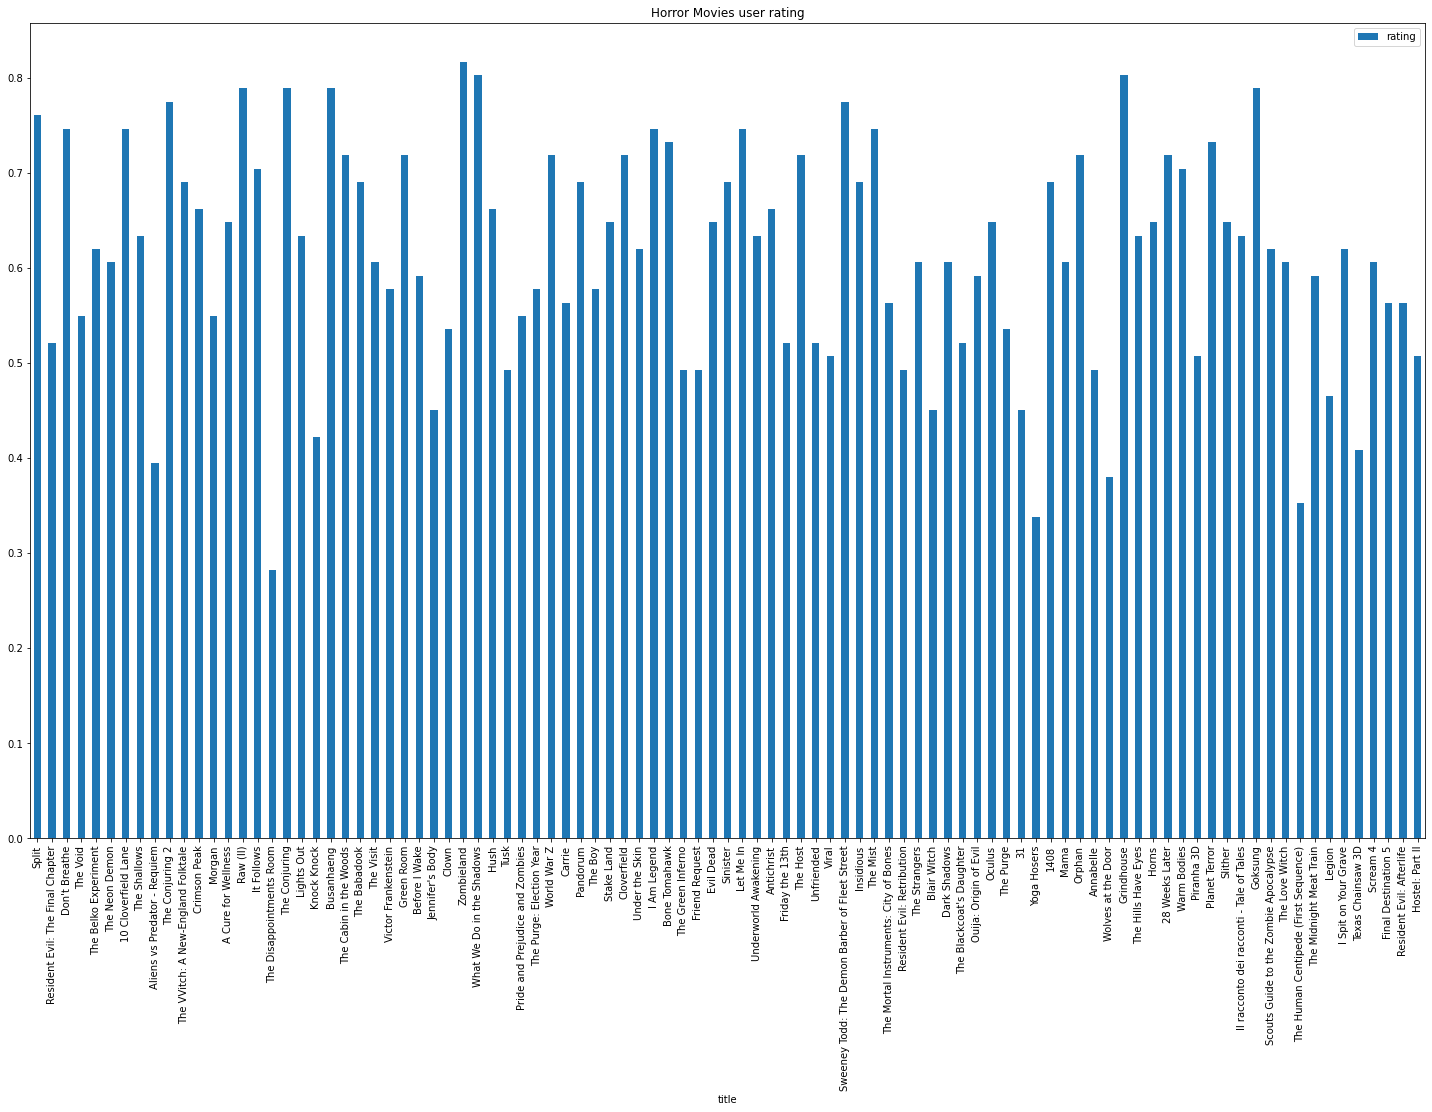

In [22]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'rating', 
                                        title= f"{genre} Movies user rating",
                                        figsize=(25,15)); # We plot just one genre for the sake of visualisation clarity.

We can do the same for metascore.

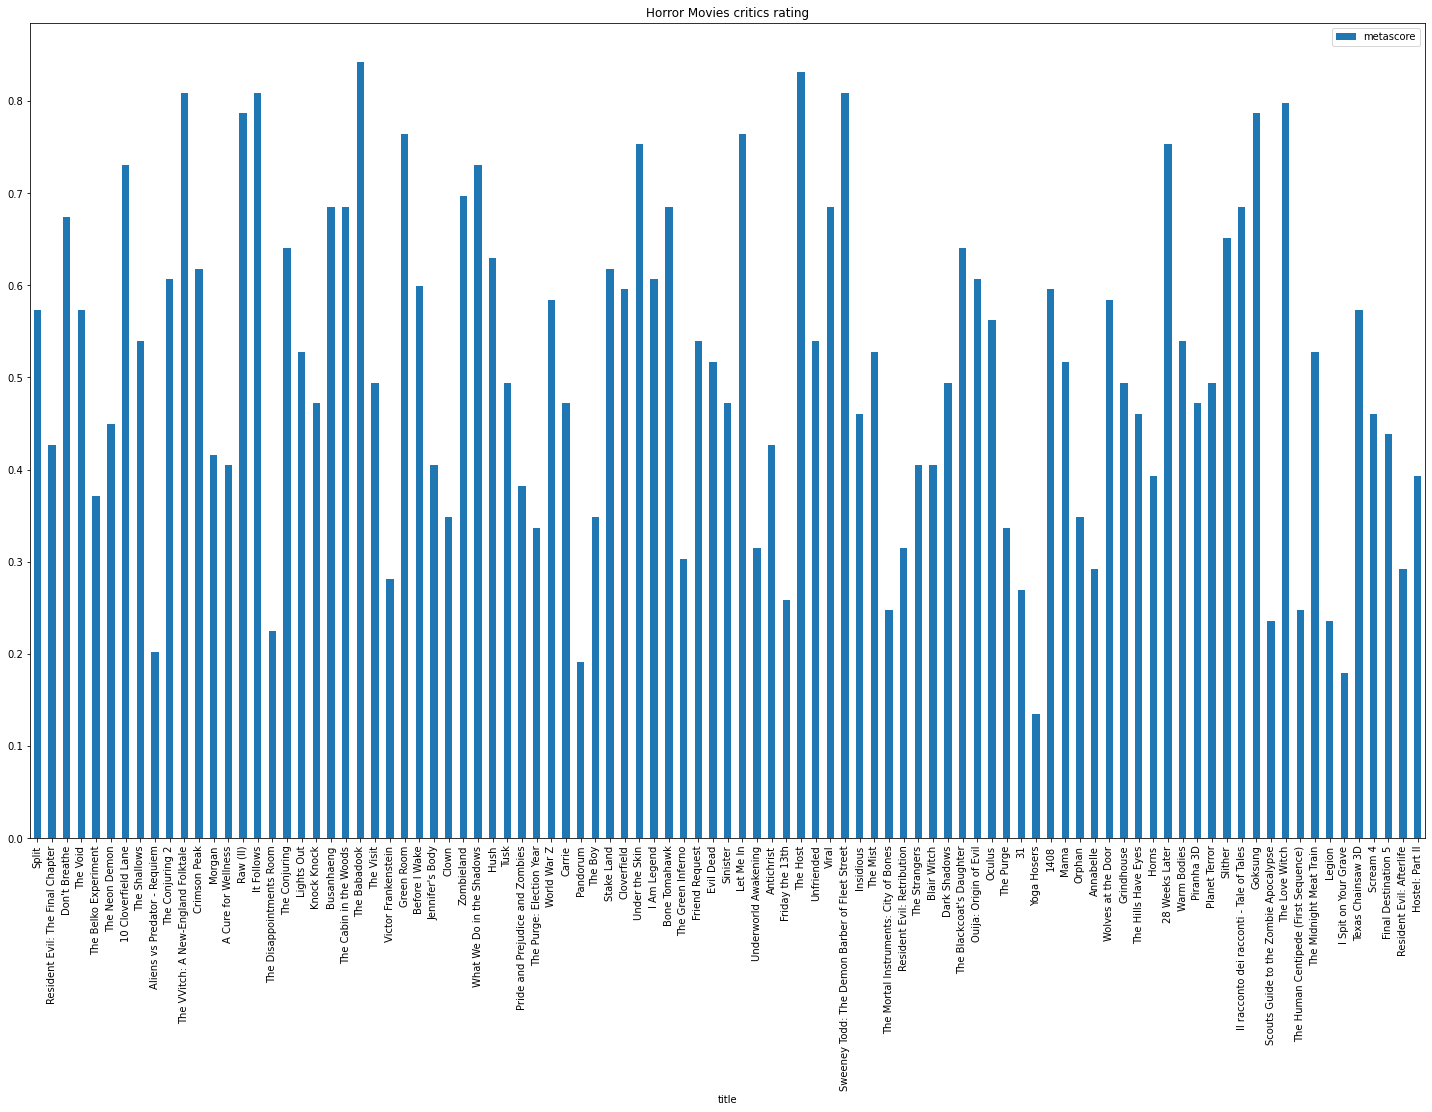

In [23]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'metascore', 
                                        title= f"{genre} Movies critics rating",
                                        figsize=(25,15)); # We plot just one genre for the sake of visualisation clarity.

And for the difference approval.

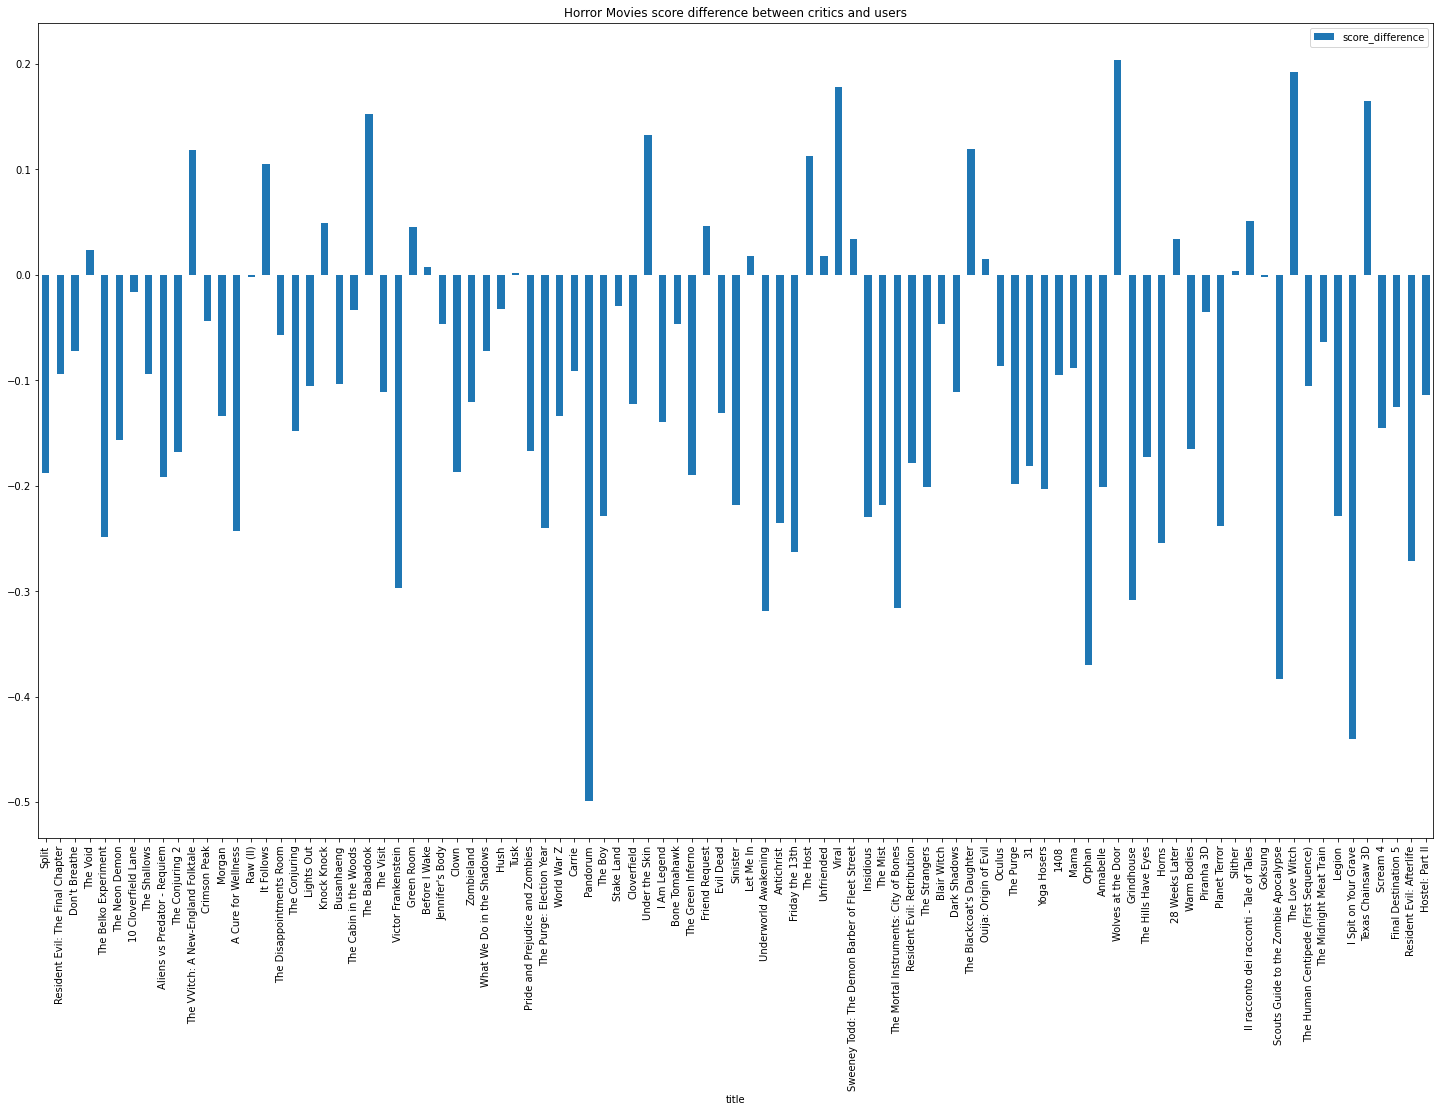

In [24]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'score_difference', 
                                        title= f"{genre} Movies score difference between critics and users",
                                        figsize=(25,15)); # We plot just one genre for the sake of visualisation clarity.

One can immediately see that the critics is on average more strict than the users about movies, with some noteworthy exceptions.

#### Directors statistics

##### Most movies

He want to answer the question about the director with most movies.

This is quite easy as there is a pandas method to do that.

In [25]:
df["director"].value_counts()

Ridley Scott          8
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
                     ..
Kevin Lima            1
François Simard       1
Henry Selick          1
Chris Buck            1
Todd Haynes           1
Name: director, Length: 525, dtype: int64

This also gives us the information about how many unique directors are in the dataframe ($525$).

##### Most appreciated

We can get some information in several slightly different ways. Here we focus on three:
1. Users appreciation
2. Critics appreciation
3. Average appreciation

To get the first two, we already have everything, for the third one, we need to calculate a new quantity that we store in a column.

In [26]:
df["mean_score"] = (df["metascore"] + df["rating"]) / 2

In [27]:
# users appreciation
df[["director", "rating"]].groupby("director").mean().sort_values(by='rating', ascending=False)

,rating
director,
Christopher Nolan,0.954930
Makoto Shinkai,0.943662
Olivier Nakache,0.943662
Florian Henckel von Donnersmarck,0.929577
Aamir Khan,0.929577
...,...
Josh Trank,0.338028
Sam Taylor-Johnson,0.309859
Joey Curtis,0.295775


In [28]:
# critics appreciation
df[["director", "metascore"]].groupby("director").mean().sort_values(by='metascore', ascending=False)

,metascore
director,
Barry Jenkins,0.988764
Kenneth Lonergan,0.955056
Todd Haynes,0.943820
Kathryn Bigelow,0.938202
Maren Ade,0.921348
...,...
Stewart Hendler,0.123596
Steven Brill,0.123596
Dan Mazer,0.078652


In [29]:
# critics appreciation
df[["director", "mean_score"]].groupby("director").mean().sort_values(by='mean_score', ascending=False)

,mean_score
director,
Lee Unkrich,0.905760
Damien Chazelle,0.904376
Florian Henckel von Donnersmarck,0.902991
Kenneth Lonergan,0.900063
Tom McCarthy,0.897294
...,...
Colin Strause,0.298307
Josh Trank,0.258902
Stewart Hendler,0.251939


##### The richest directors

Or better the ones who recorded the most at the box office.

By now, you should be an expert and do this calculation easily.

In [30]:
df[["director", "revenue_millions"]].groupby(by="director", as_index=False)["revenue_millions"].sum().sort_values(by='revenue_millions', ascending=False)

,director,revenue_millions
200,J.J. Abrams,1683.45
126,David Yates,1630.51
88,Christopher Nolan,1515.09
341,Michael Bay,1421.32
155,Francis Lawrence,1299.81
...,...,...
186,Gus Van Sant,0.02
428,Robin Swicord,0.01
465,So Yong Kim,0.01
384,Patricia Rozema,0.01


#### Actors who participated in the most movies

We can count how many movies an actor appears in, by creating a column with a list of actors (we did this implicitly before), and then using the method [`explode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html).

In [31]:
df["actors_list"] = df.actors.apply(lambda x: x.replace(", ", ",").split(","))
df

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,score_difference,mean_score,actors_list
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,0.873239,757074,333.13,0.730337,-0.142902,0.801788,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ..."
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,0.718310,485820,126.46,0.606742,-0.111568,0.662526,"[Noomi Rapace, Logan Marshall-Green, Michael F..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,0.760563,157606,138.12,0.573034,-0.187530,0.666799,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa..."
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,0.746479,60545,270.32,0.539326,-0.207153,0.642902,"[Matthew McConaughey, Reese Witherspoon, Seth ..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,0.605634,393727,325.02,0.325843,-0.279791,0.465738,"[Will Smith, Jared Leto, Margot Robbie, Viola ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,0.563380,140900,60.13,0.292135,-0.271245,0.427758,"[Milla Jovovich, Ali Larter, Wentworth Miller,..."
994,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,0.676056,164088,54.72,0.415730,-0.260326,0.545893,"[Thomas Mann, Oliver Cooper, Jonathan Daniel B..."
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,0.507042,73152,17.54,0.393258,-0.113784,0.450150,"[Lauren German, Heather Matarazzo, Bijou Phill..."
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,0.605634,70699,58.01,0.438202,-0.167432,0.521918,"[Robert Hoffman, Briana Evigan, Cassie Ventura..."


In [32]:
(df.explode("actors_list")
    .groupby(by="actors_list")["actors_list"]
    .count()
    .sort_values(ascending=False))

actors_list
Mark Wahlberg         15
Hugh Jackman          14
Brad Pitt             13
Tom Hardy             12
Scarlett Johansson    12
                      ..
James Kelley           1
James Gandolfini       1
James Floyd            1
James DuMont           1
Óscar Jaenada          1
Name: actors_list, Length: 1702, dtype: int64

We can plot this information.

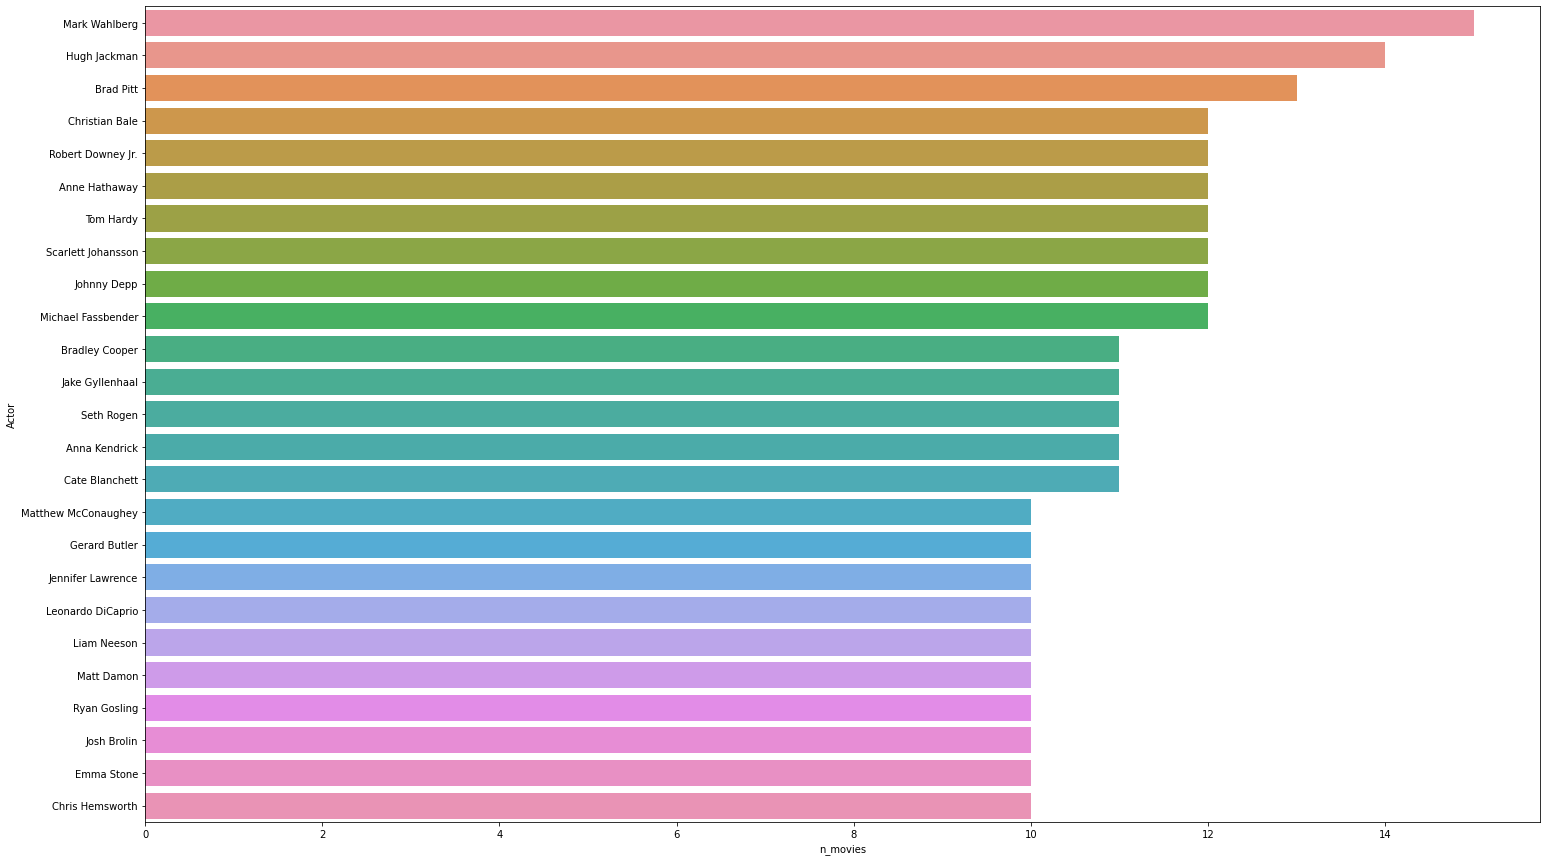

In [33]:
 plt.figure(figsize=(25, 15)) 
 plot_df = df.explode("actors_list")["actors_list"].value_counts()
 plot_df = pd.DataFrame(plot_df.items(), columns=['Actor', 'n_movies'])
 sns.barplot(x="n_movies", y="Actor", data=plot_df.head(25));

#### Analysis of the annual trend of a specific genre movie in terms of quantity of films produced, commercial success and appreciation

This is maybe the most interesting part of the analysis. 
We are going to visualise results for "Sci-Fi" movies, however, let's try to keep the genre-choice parametric so that we can easily explore another genre without re-writing any code.

_Aside note_: your greatest moving force should be [laziness](https://levelup.gitconnected.com/a-good-programmer-is-a-lazy-programmer-8982b2d971bb).

<p align="center">
    <img width="565" src="https://miro.medium.com/max/800/1*PFUIR7s5c2dul489XJJoQA.png">
</p>

First of all let's plot the number of movies in the genre over years.

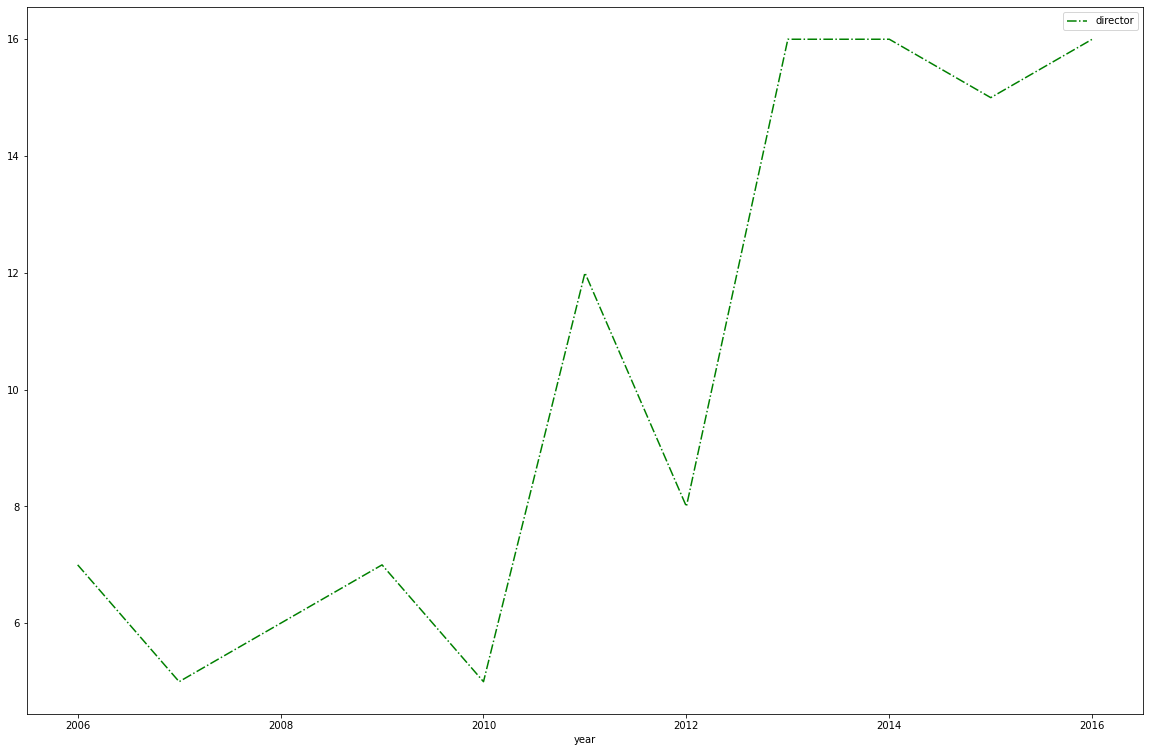

In [34]:
genre_to_select = "Sci-Fi"

df_genre = df[df["genre"].str.contains(genre_to_select)]
df_genre[["year", "director"]].groupby(by=["year"]).count().plot(linestyle="-.",
                                                                color="g",
                                                                figsize=(20, 13));

Let's plot a `countplot`. This is great to visualise how the occurrences of a categorical variable (marked as object) are distributed.

_Note_ The countplot counts the occurrences of all categories, to be used carefully if there are many categories within the column, this will become messy soon.

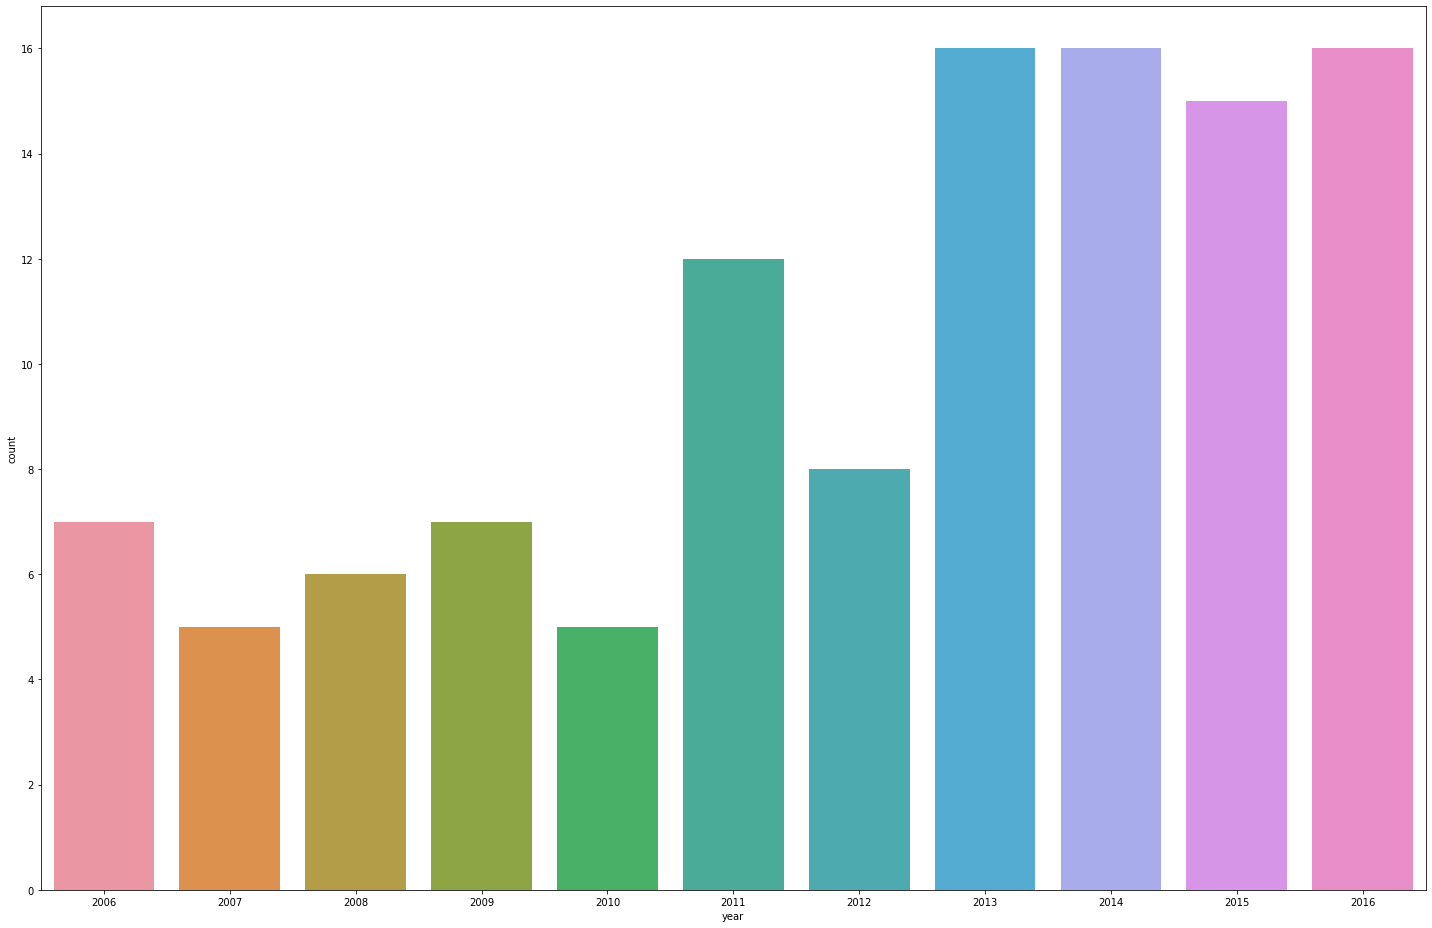

In [35]:
plt.figure(figsize=(20,13))
sns.countplot(x = "year", data = df_genre)
plt.tight_layout()
plt.show()

Let's now plot the trend of `metascore` and `rating` over time.

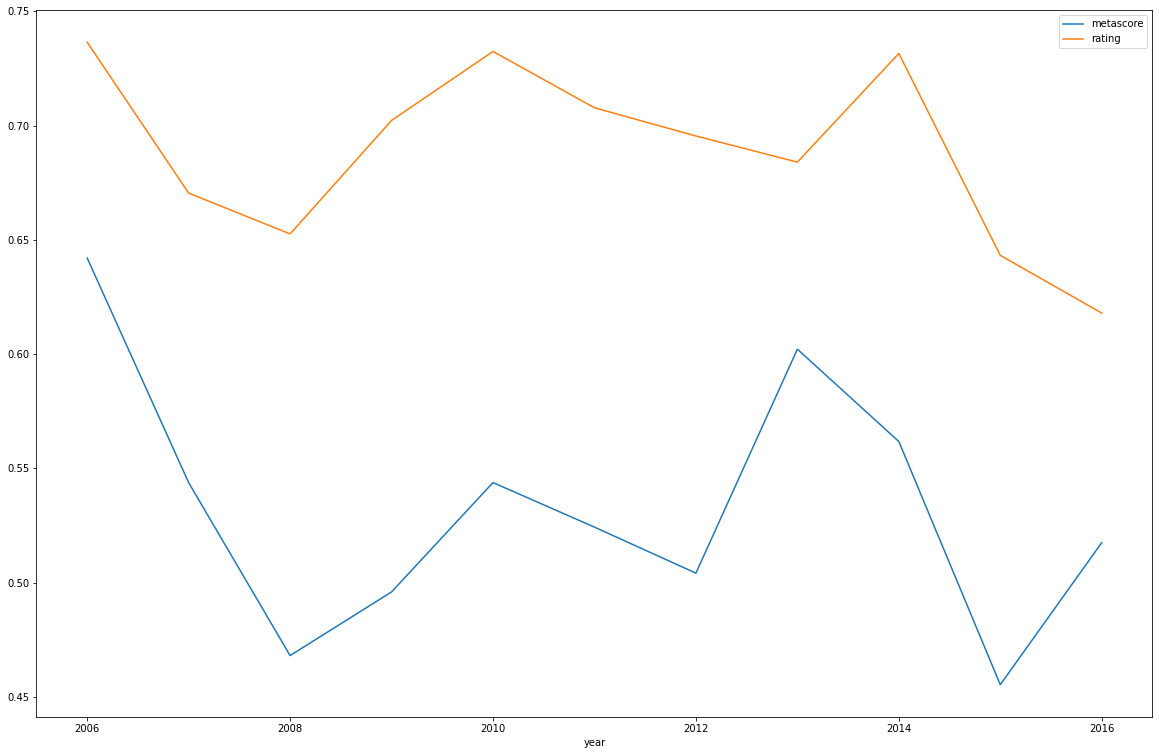

In [36]:
df_genre[["year", "metascore", "rating"]].groupby("year")[["metascore", "rating"]].mean().plot(figsize=(20, 13));

#### An embrion of text analysis

In the same genre, we want to count which terms occurs the most.

In [37]:
# This prints punctuation, to see what to exclude

print(f"punctuation -> {punctuation}")

punctuation -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Let's now operate on the description column of the filtered dataframe.

In [40]:
documents = [text.split() for text in df_genre["description"]]

for i, sentence in enumerate(documents[:5]):
    print(i, ": ", sentence)
    print("-"*20)

0 :  ['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe.']
--------------------
1 :  ['Following', 'clues', 'to', 'the', 'origin', 'of', 'mankind,', 'a', 'team', 'finds', 'a', 'structure', 'on', 'a', 'distant', 'moon,', 'but', 'they', 'soon', 'realize', 'they', 'are', 'not', 'alone.']
--------------------
2 :  ['The', 'Rebel', 'Alliance', 'makes', 'a', 'risky', 'move', 'to', 'steal', 'the', 'plans', 'for', 'the', 'Death', 'Star,', 'setting', 'up', 'the', 'epic', 'saga', 'to', 'follow.']
--------------------
3 :  ['When', 'twelve', 'mysterious', 'spacecraft', 'appear', 'around', 'the', 'world,', 'linguistics', 'professor', 'Louise', 'Banks', 'is', 'tasked', 'with', 'interpreting', 'the', 'language', 'of', 'the', 'apparent', 'alien', 'visitors.']
--------------------
4 :  ['Two', 'decades', 'after', 'the', 'first', 'Independence', 'Day', 'invasion,', '

As you can see we have a list of terms.
Here we count the number of times a term occurs by the `Counter` object.

First, we filter out punctuation.

__Quick exercise__:  Try to use the method `eplode` to count occurrences.

In [41]:
tokens = [item for sublist in documents for item in sublist if item not in punctuation] # this produces a list of words.

# view result, with most_common you can view the keys with multiple occurrences.
Counter(tokens).most_common(25)

[('a', 167),
 ('the', 166),
 ('to', 117),
 ('of', 100),
 ('and', 72),
 ('in', 57),
 ('is', 42),
 ('an', 41),
 ('on', 37),
 ('his', 36),
 ('A', 32),
 ('with', 29),
 ('for', 25),
 ('from', 24),
 ('that', 22),
 ('by', 19),
 ('her', 18),
 ('their', 18),
 ('must', 16),
 ('he', 15),
 ('are', 14),
 ('as', 13),
 ('The', 12),
 ('after', 12),
 ('world', 12)]

As you can see the most common words are article, prepositions etc. This is because usually in text analysis we exclude such words.

__Quick exercise__:  Create an `exclude_list` of too common words and rewrite the `tokens` list comprehension to not take them into account.

### Correlations

This is a really important part of the analysis. We want to see if variables are correlated between each other. 

One can use the `corr` method in pandas. By default the pearson correlation index is used, the method can be changed via the method parameter

In [42]:
# How correlated are Users approval and Critics one.
df[["rating", "metascore"]].corr() 

,rating,metascore
rating,1.000000,0.667801
metascore,0.667801,1.000000


Let's visualise this with a scatter plot.

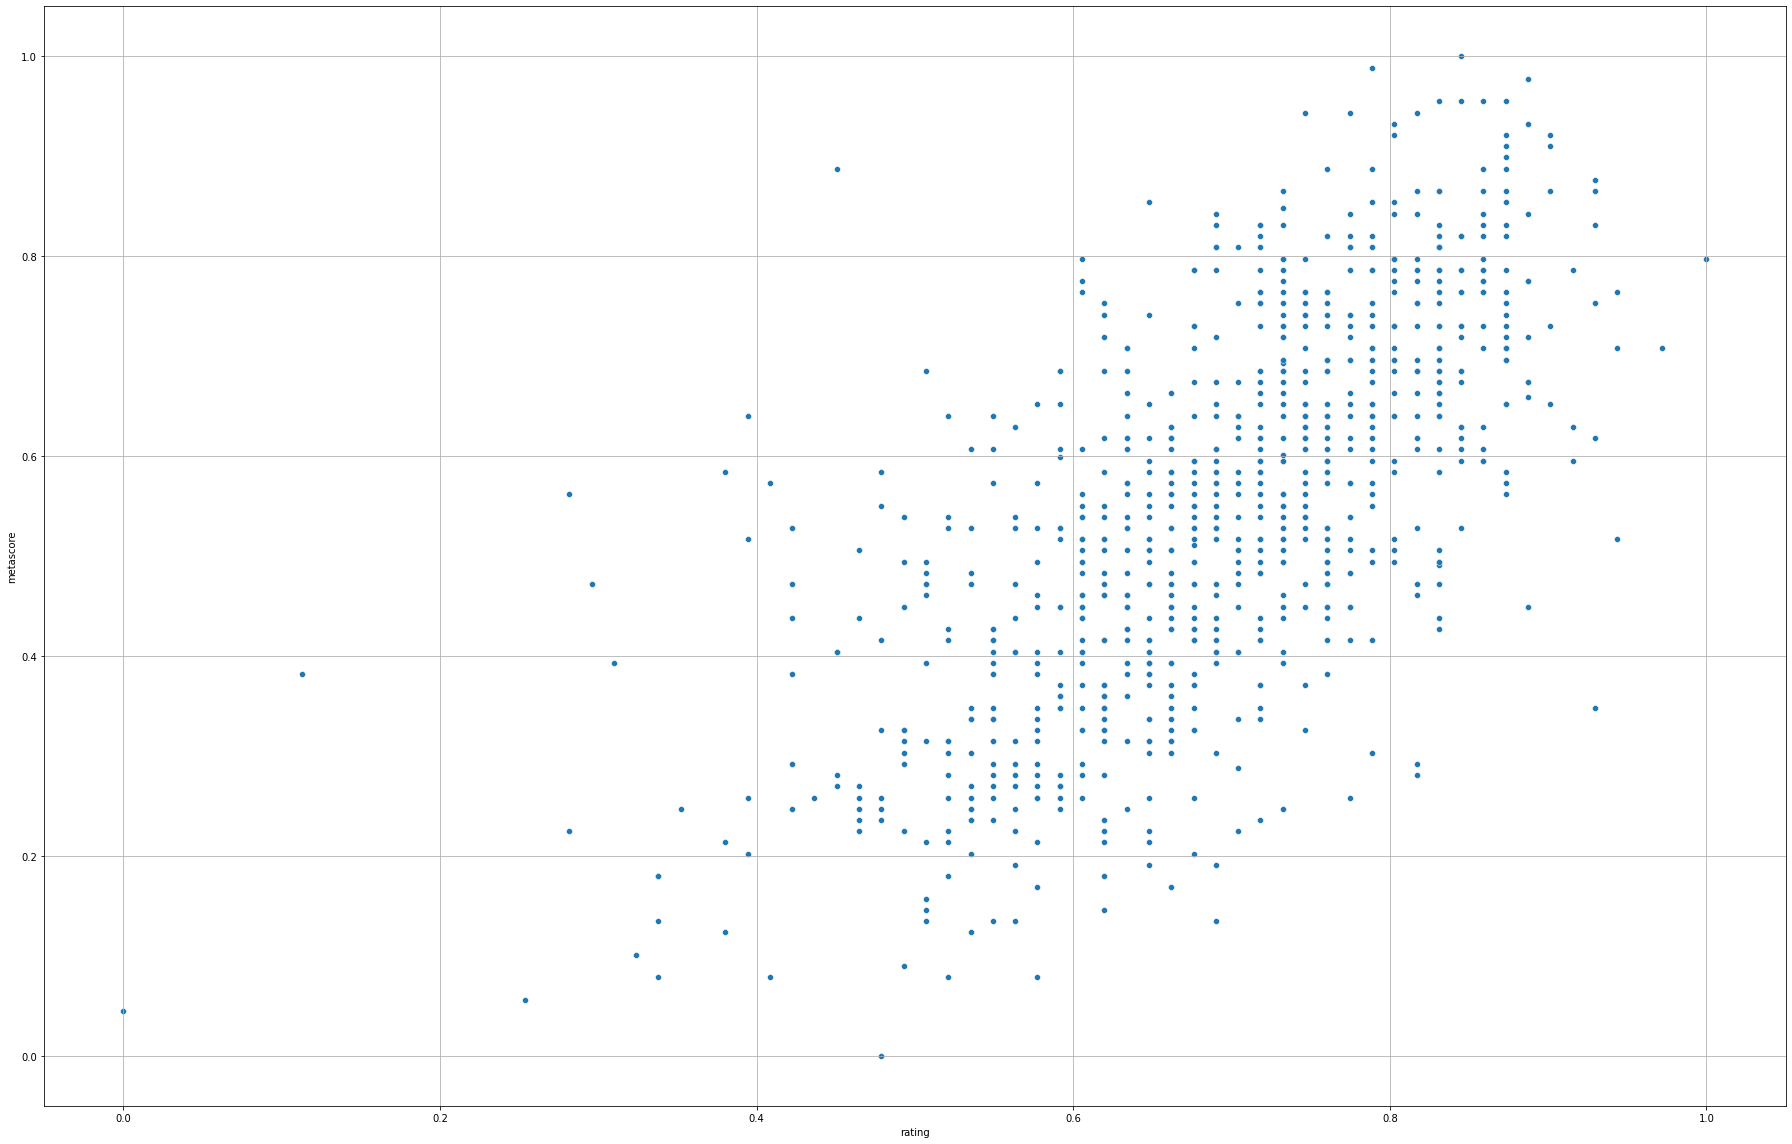

In [44]:
plt.figure(figsize=(25, 16))
sns.scatterplot(x="rating", y="metascore", data=df)
plt.tight_layout()
plt.grid()

We can have fun and explore other coupled variables. _E.g._ the length of the movie and its level of appreciation.

In [47]:
# Correlation between the length of the film and its level of appreciation
df[["runtime", "metascore", "rating"]].corr()

,runtime,metascore,rating
runtime,1.000000,0.215164,0.369684
metascore,0.215164,1.000000,0.667801
rating,0.369684,0.667801,1.000000


Not as correlated as the two ratings measures. One can visualise correlation coefficients with an heatmap.

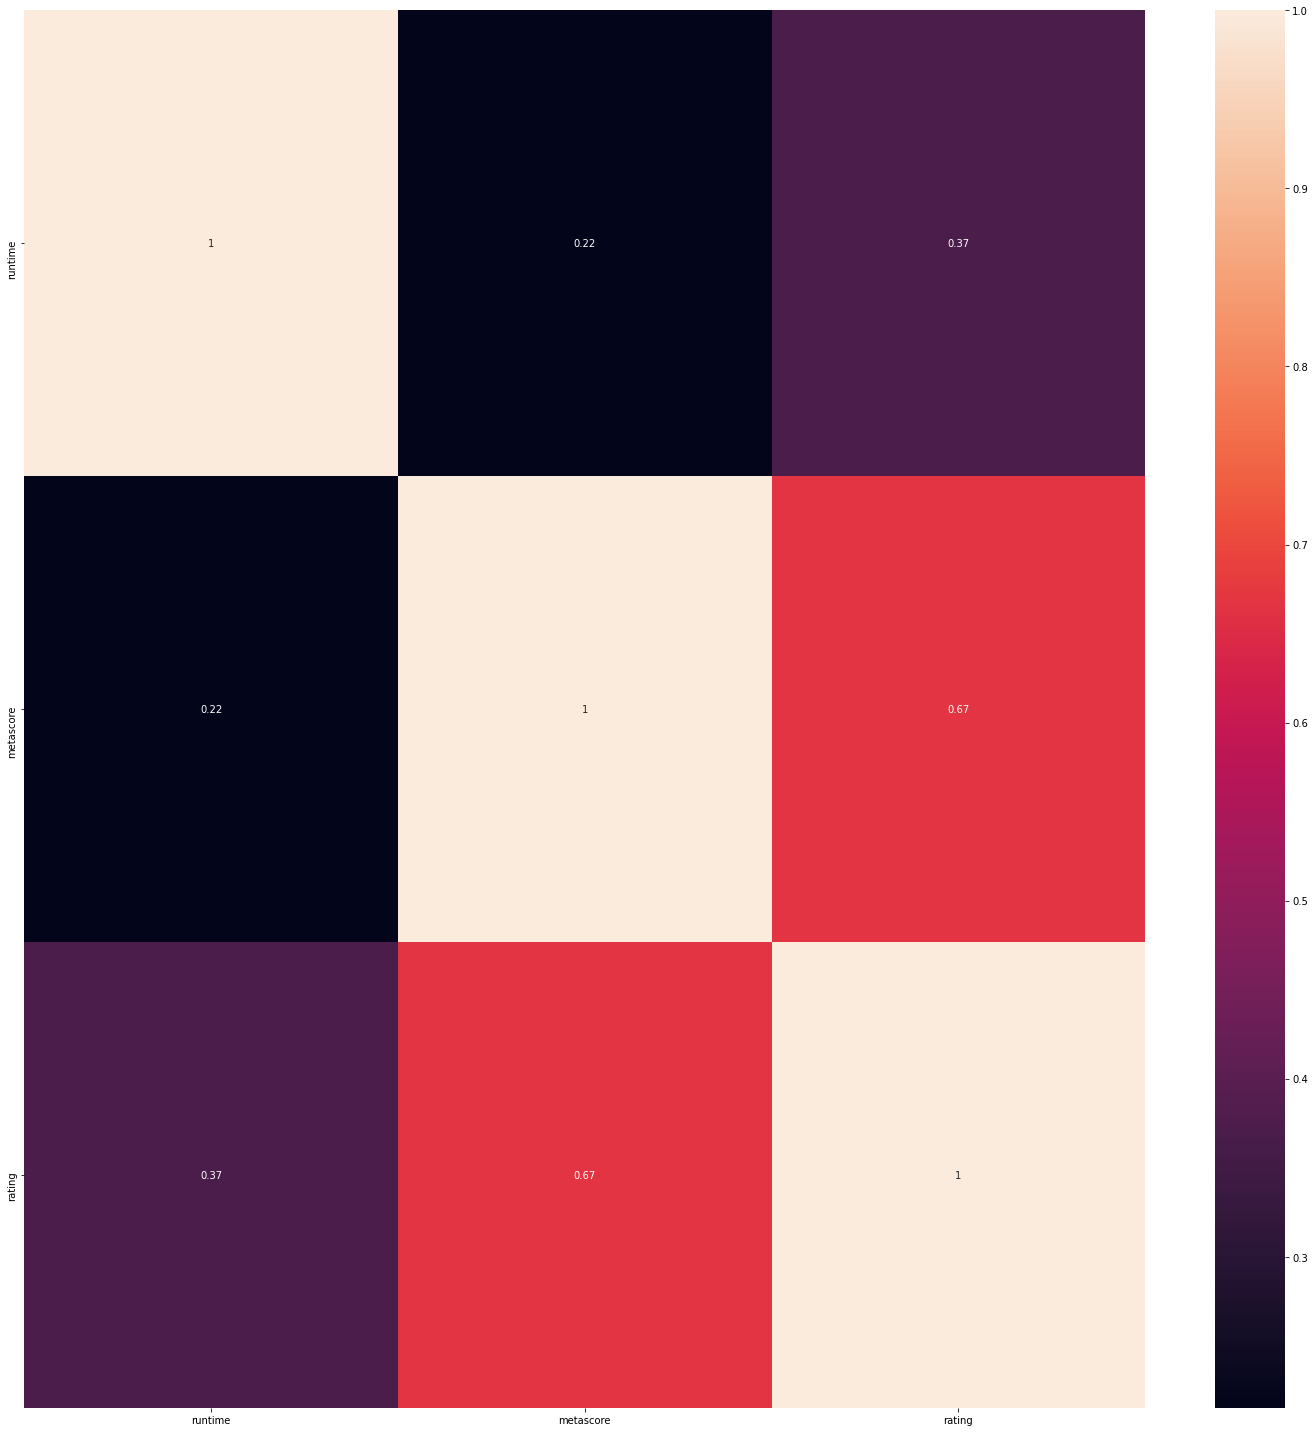

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[["runtime", "metascore", "rating"]].corr(), annot=True)
plt.tight_layout()

Now an interesting one: the revenue of the movie and its level of appreciation.

In [51]:
df[["revenue_millions", "mean_score"]].corr()

,revenue_millions,mean_score
revenue_millions,1.000000,0.191074
mean_score,0.191074,1.000000


Really not much correlated.

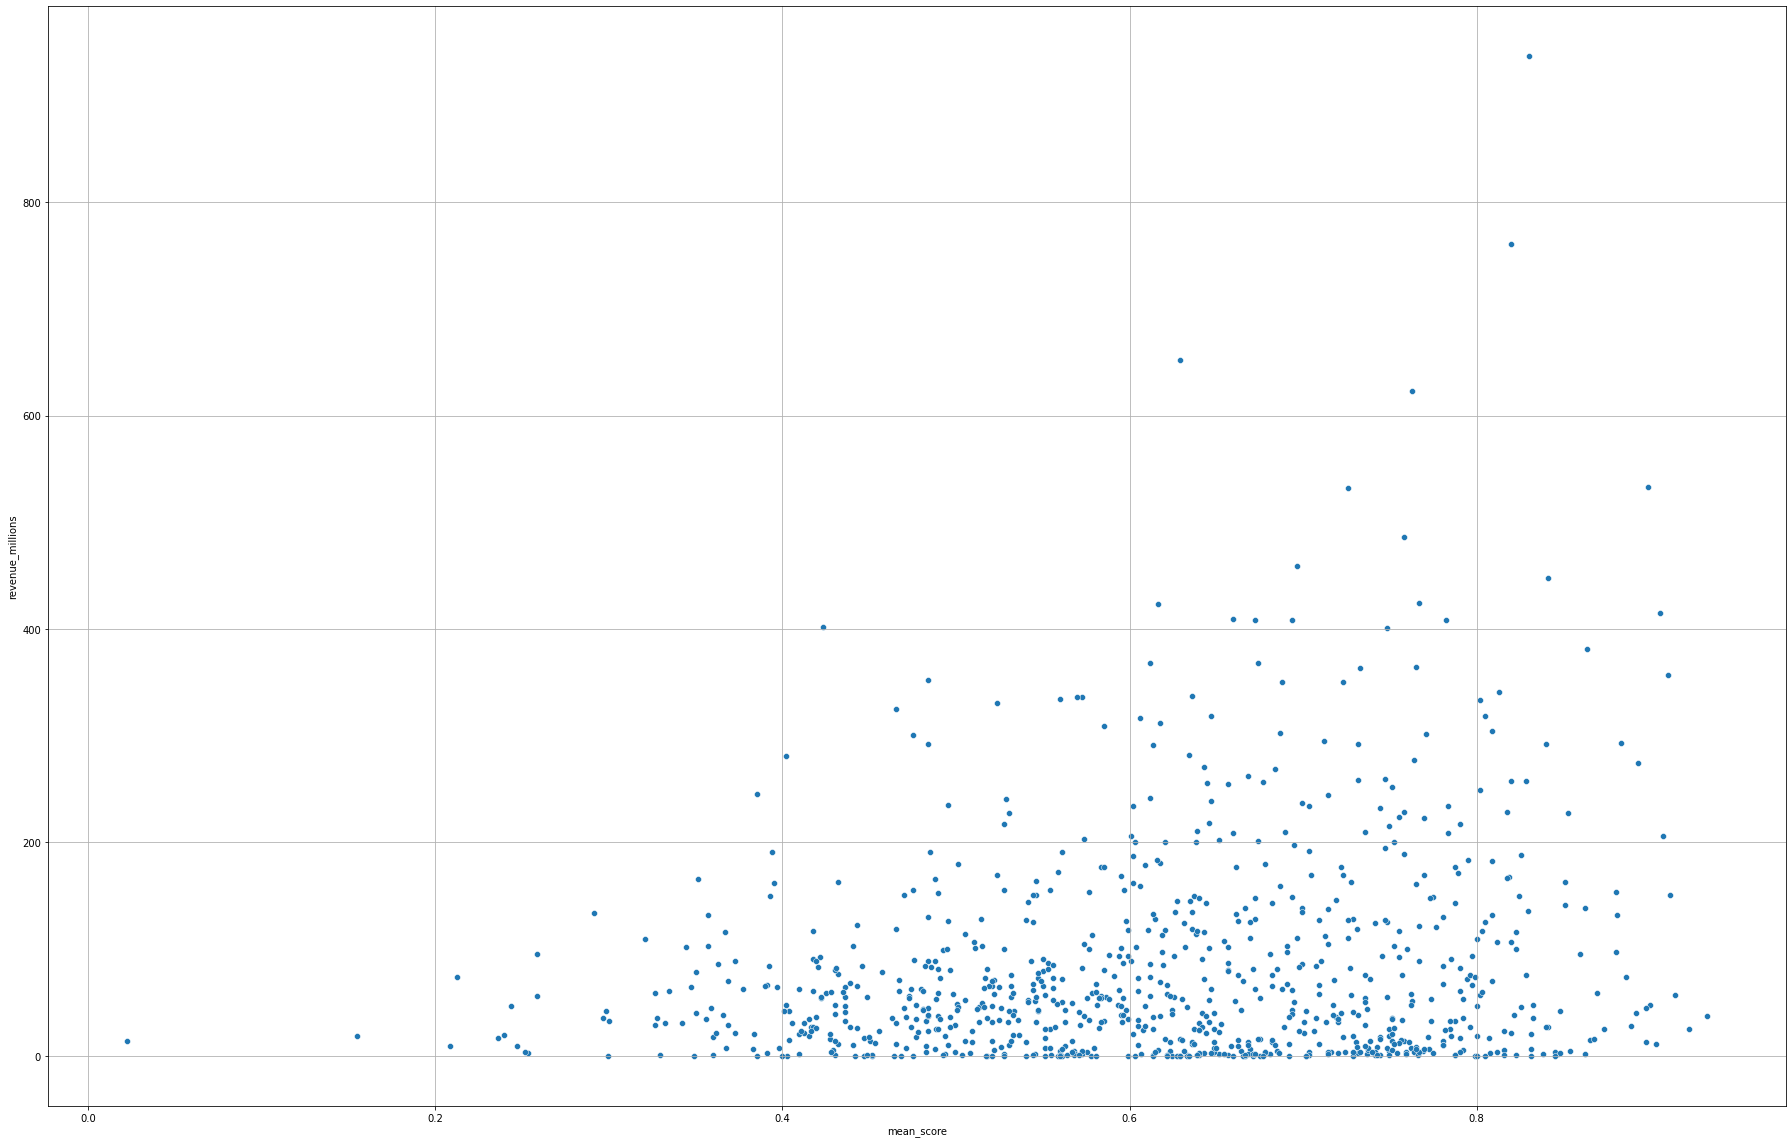

In [52]:
plt.figure(figsize=(25, 16))
sns.scatterplot(x="mean_score", y="revenue_millions", data=df)
plt.tight_layout()
plt.grid()

As one can see there is plenty of movies with low revenue and still very appreciated.

On the other hands, the revenue is correlated with the number of votes the movie got in the IMDB platform.

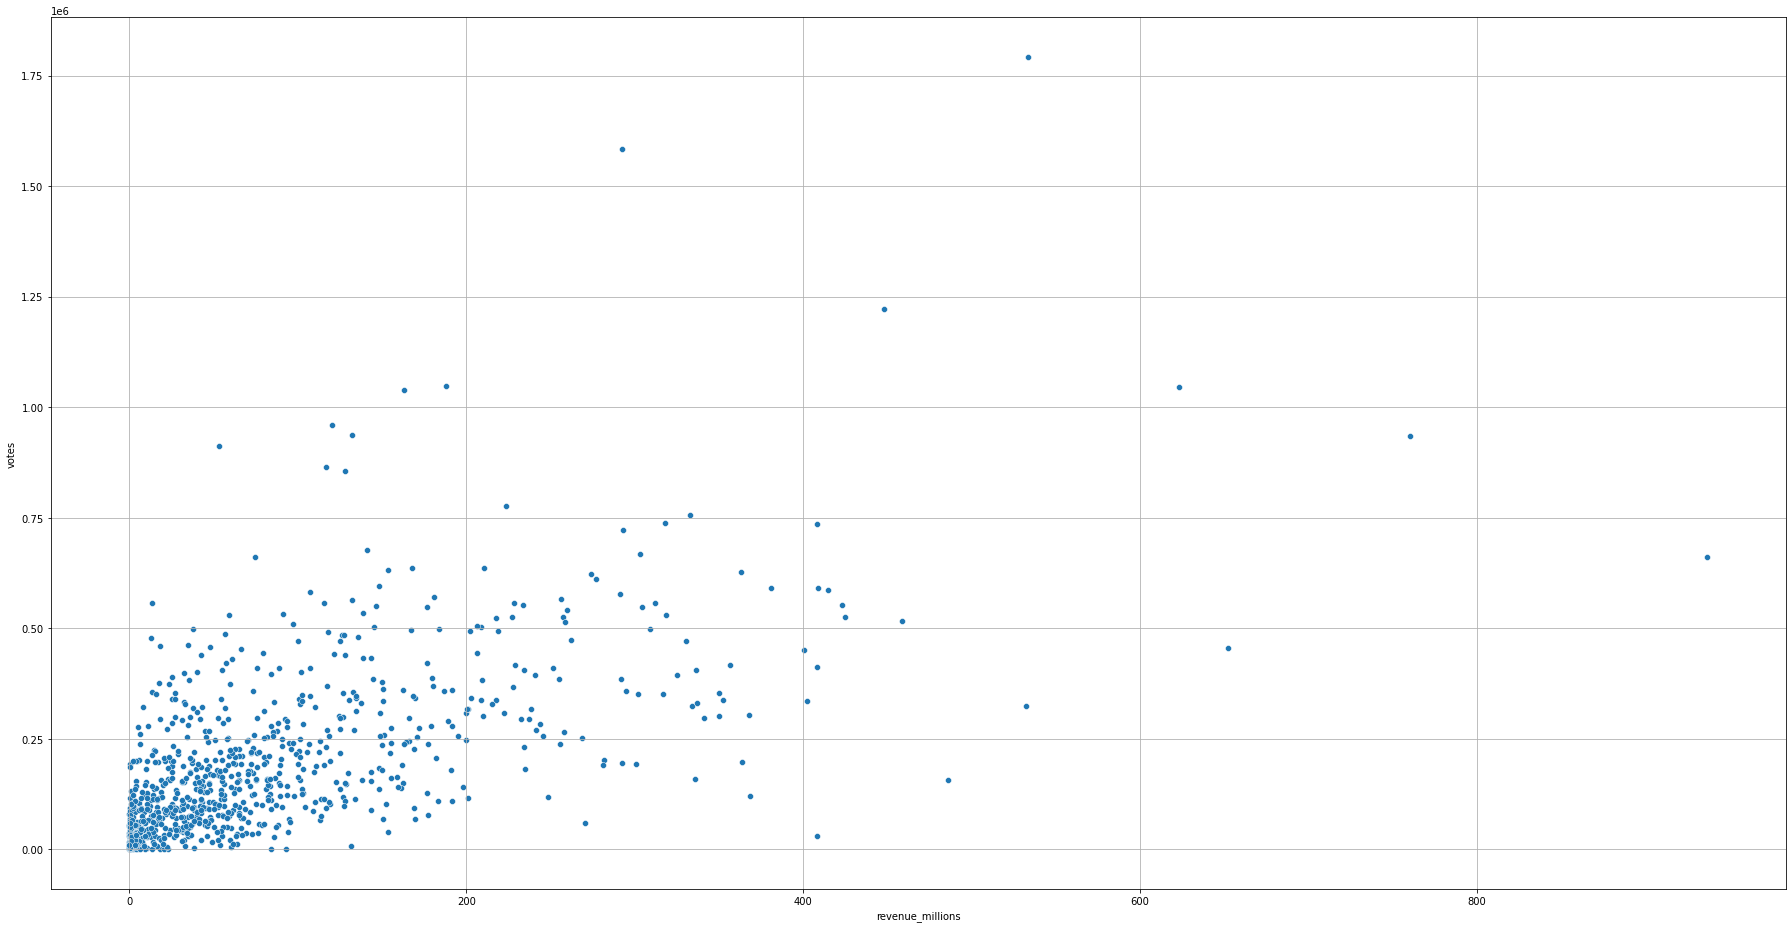

In [53]:
plt.figure(figsize=(25, 13))
sns.scatterplot(x="revenue_millions", y="votes", data=df)
plt.tight_layout()
plt.grid()
plt.show()

In [54]:
df[['revenue_millions', "votes"]].corr()

,revenue_millions,votes
revenue_millions,1.000000,0.630818
votes,0.630818,1.000000


Instead of exploring this in couples, one can plot directly a [`pairplot`](https://www.geeksforgeeks.org/data-visualization-with-pairplot-seaborn-and-pandas/) this is a plot allowing you to visualise correlation plots between variables in the same graph.

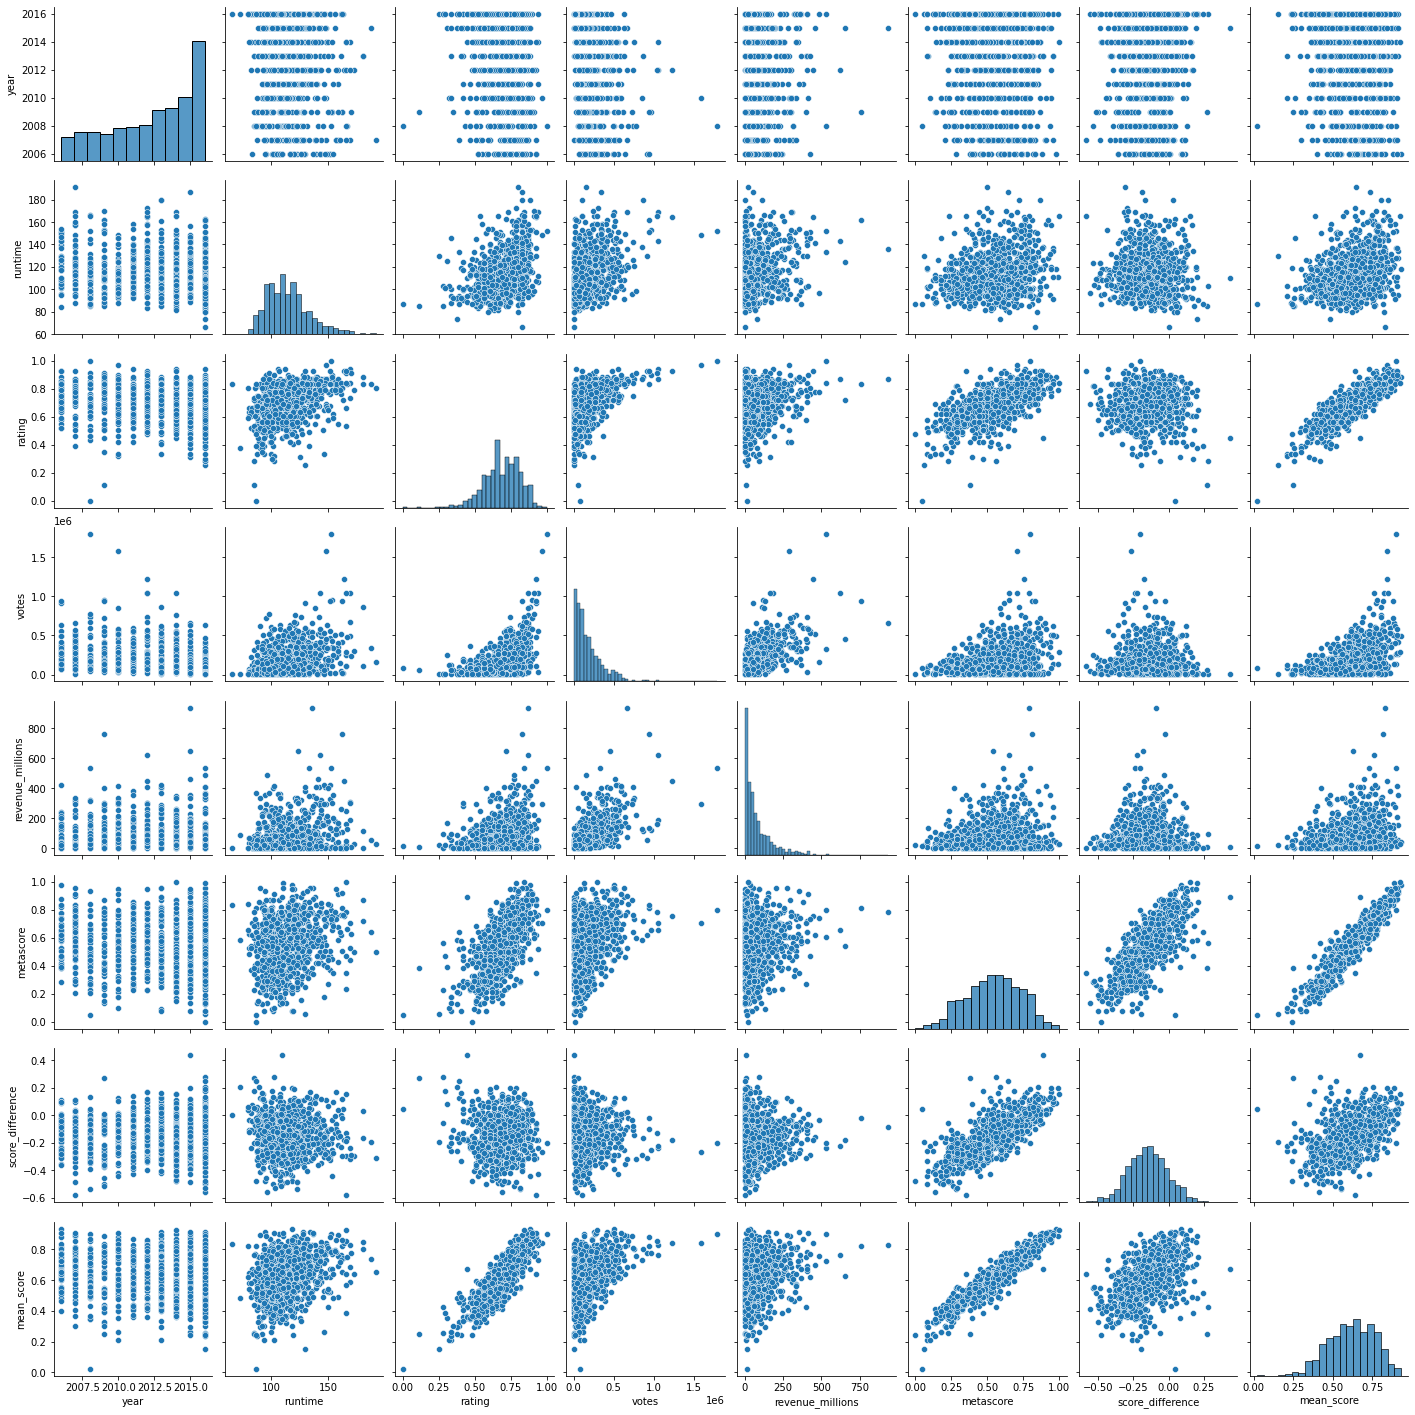

In [55]:
sns.pairplot(df);

#### Distribution analysis

We might want to study the continuous variables distribution. This can be easily done by a `displot`.

We strongly advice to read [this nice post](https://michaelwaskom.medium.com/announcing-the-release-of-seaborn-0-11-3df0341af042) to find nice plots and details.

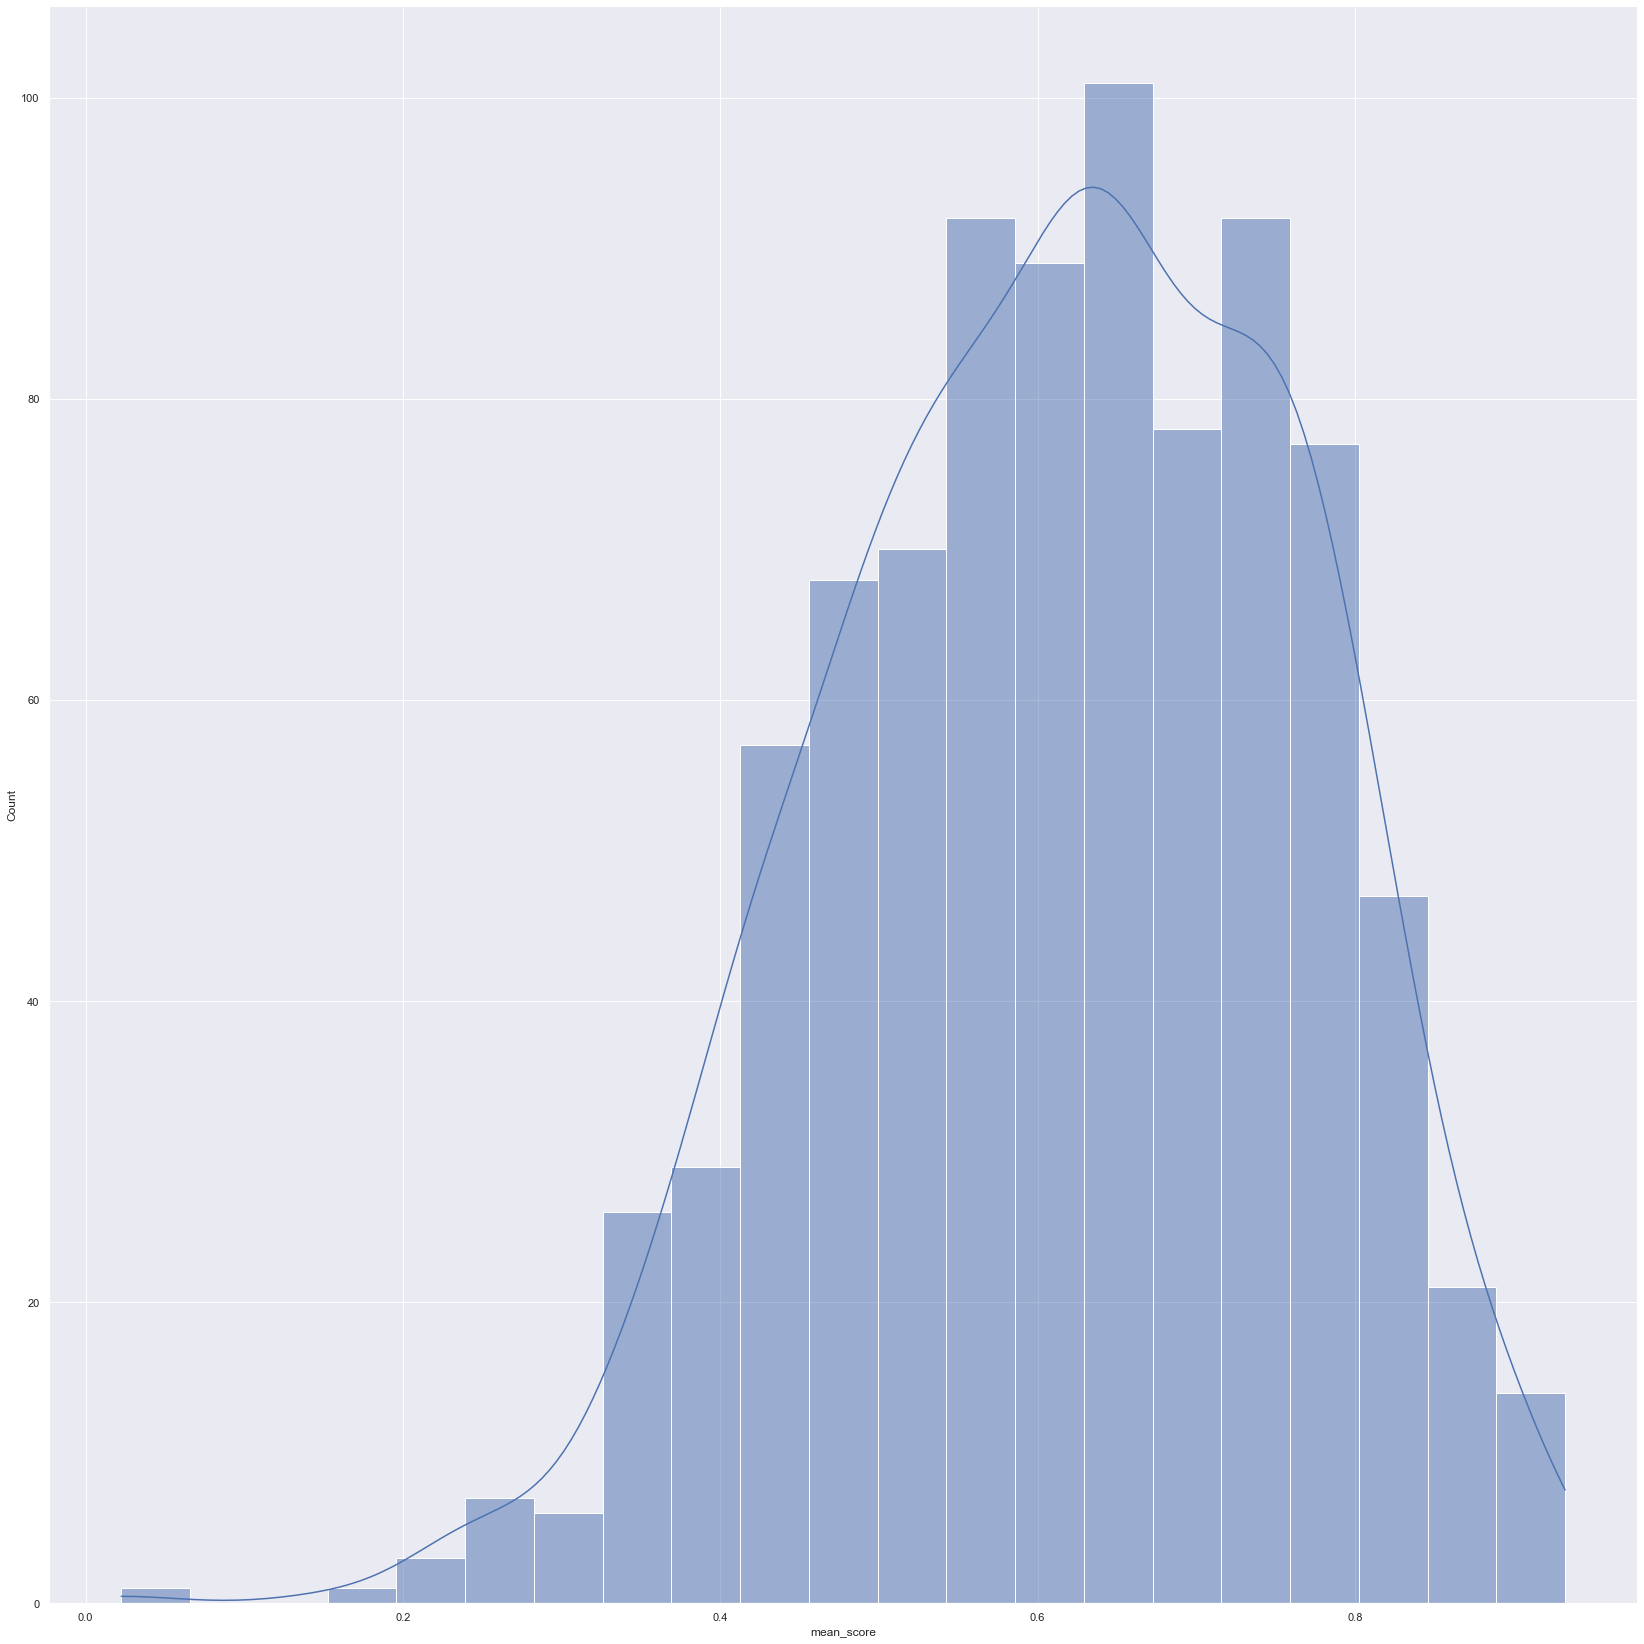

In [74]:
# example: metascore distribution
sns.displot(
    data=df, kind="hist", kde=True,
    x="mean_score",  height=23);

### Boxplot or Violin plot
we can check for distributions and outliers of variables with boxplot and violin plot.

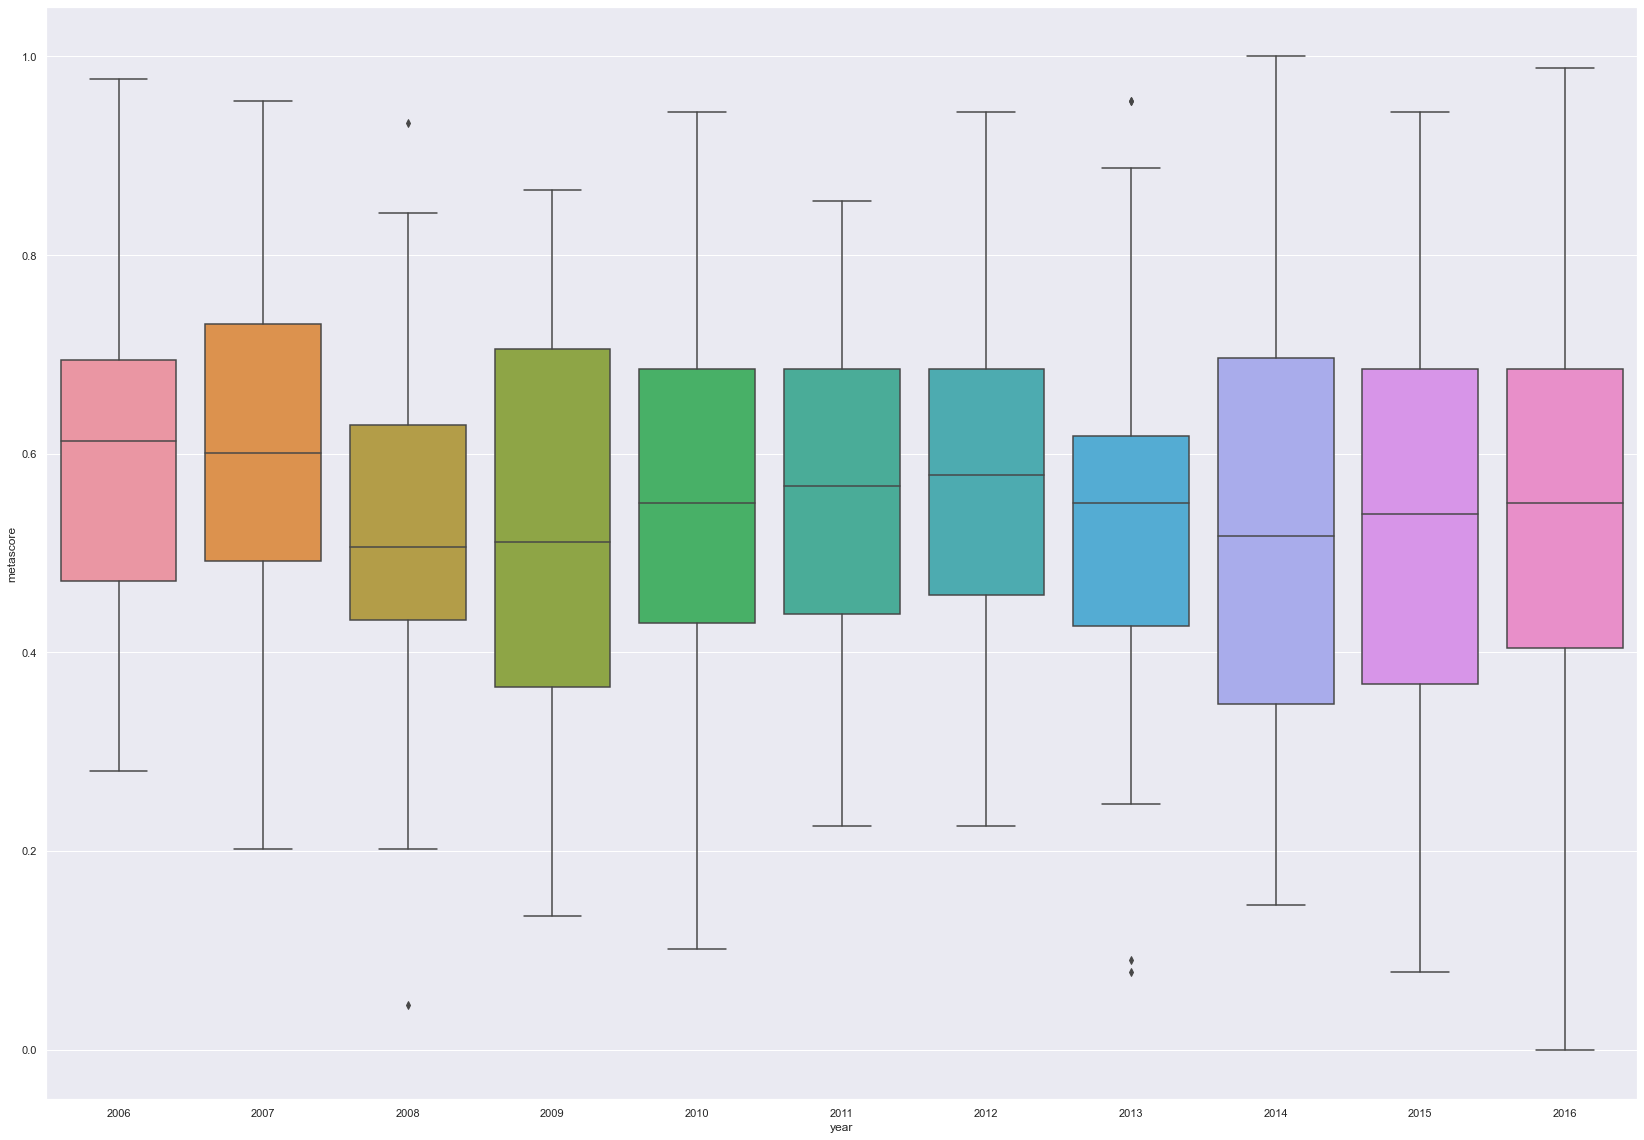

In [69]:
plt.figure(figsize=(23, 16))
sns.boxplot(x="year", y="metascore", data=df)
plt.tight_layout()

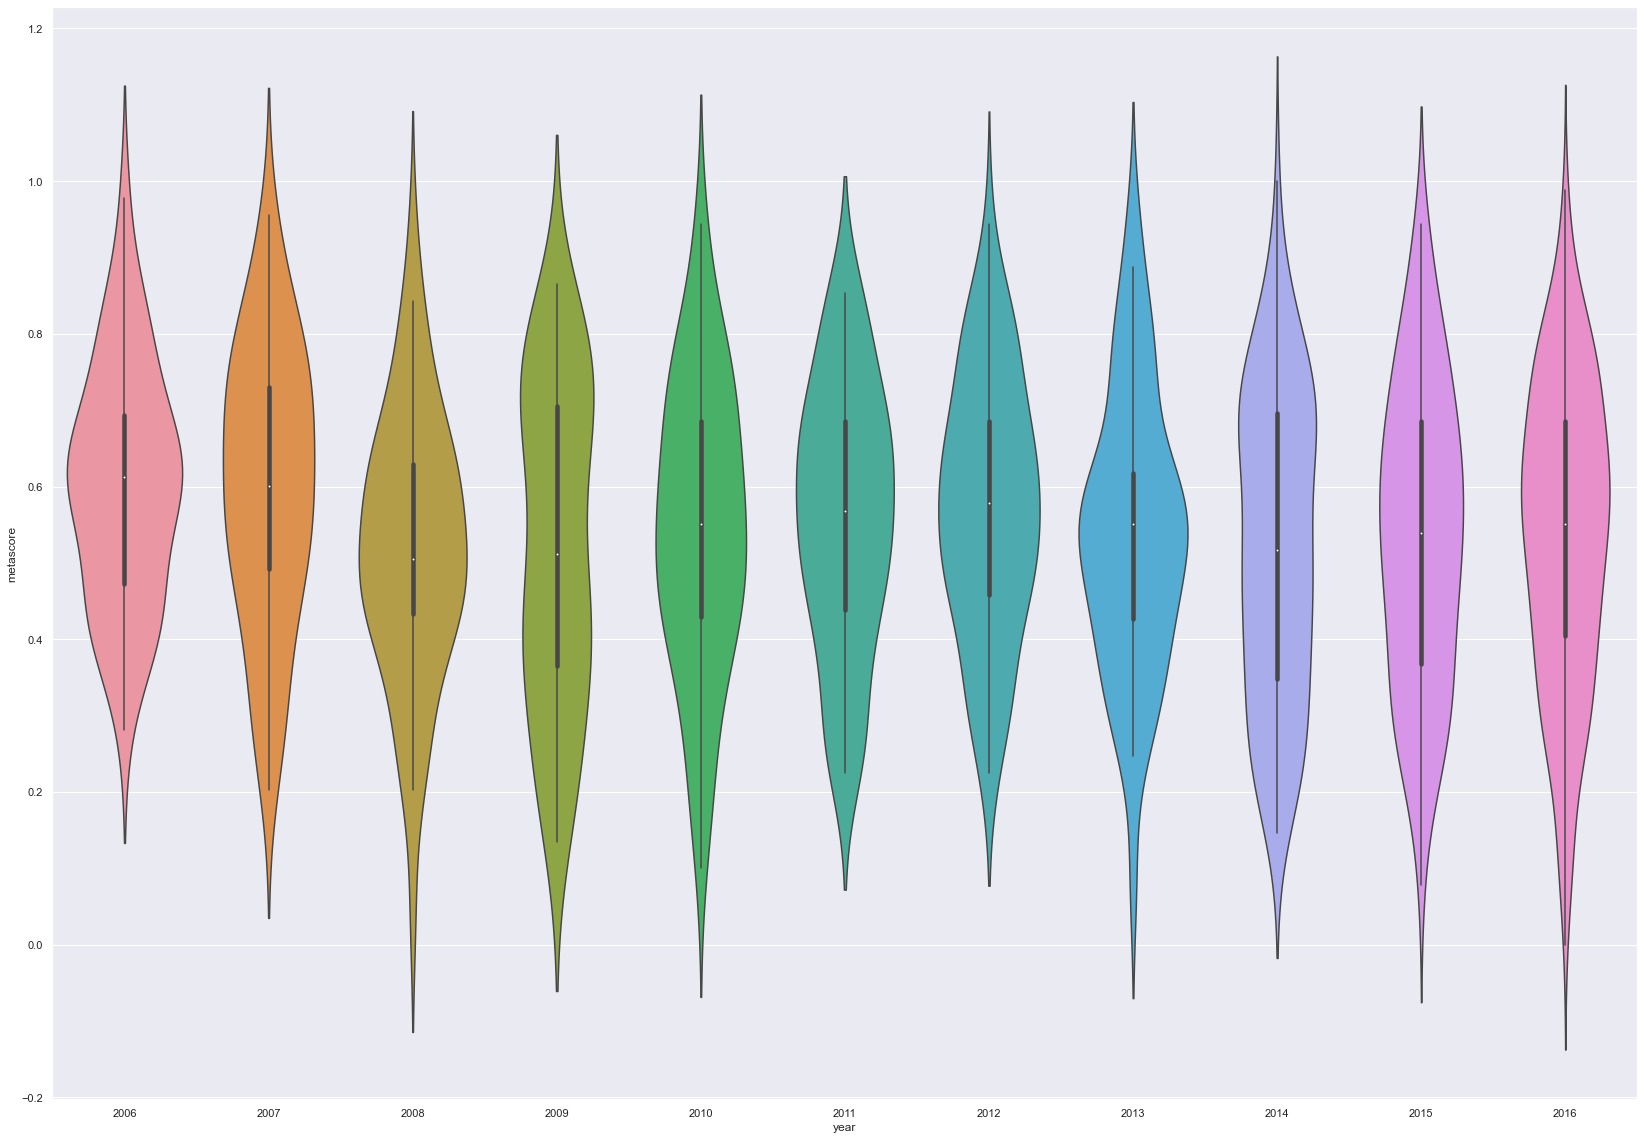

In [70]:
plt.figure(figsize=(23, 16))
sns.violinplot(x="year", y="metascore", data=df)
plt.tight_layout()

Finally, we present the `hue` parameter present in almost all the seaborn plots. It allows you to add an additional level of discrimination.

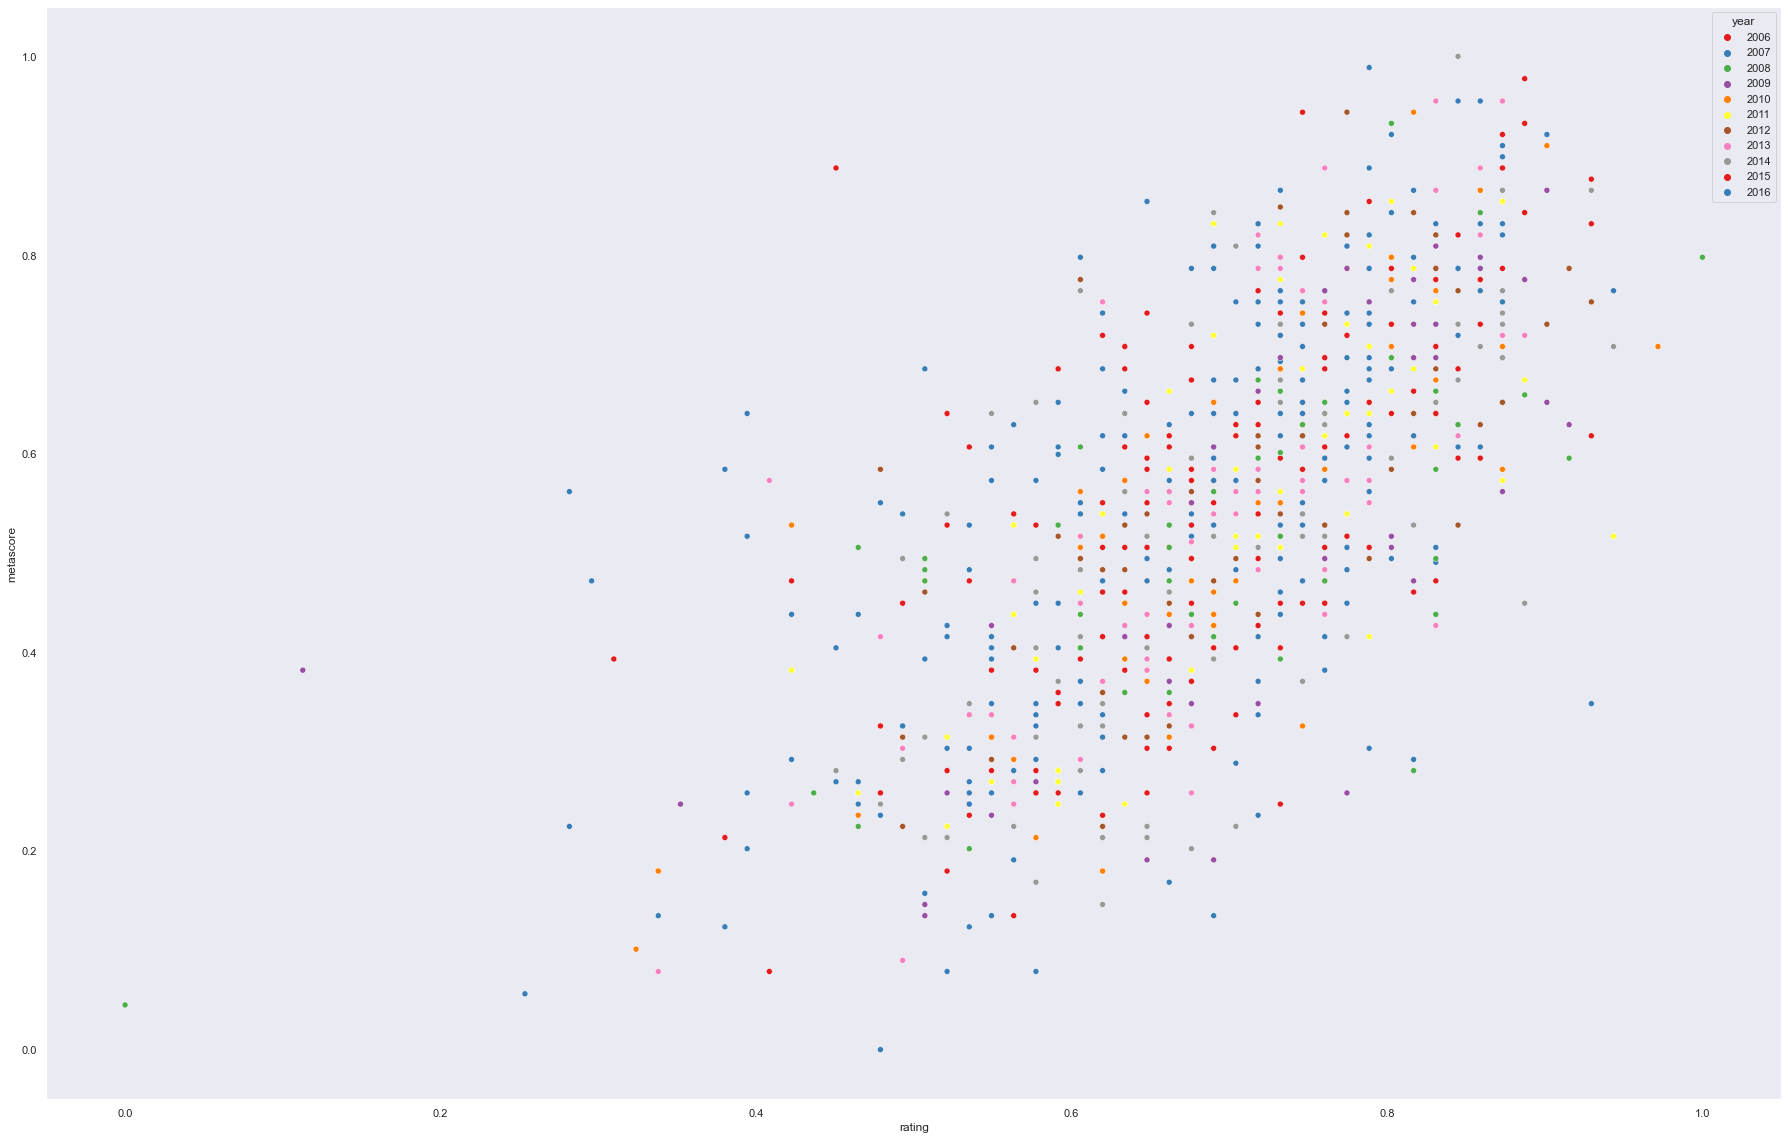

In [71]:
plt.figure(figsize=(25, 16))
sns.scatterplot(x="rating", y="metascore", hue="year", data=df, palette="Set1")
plt.tight_layout()
plt.grid()

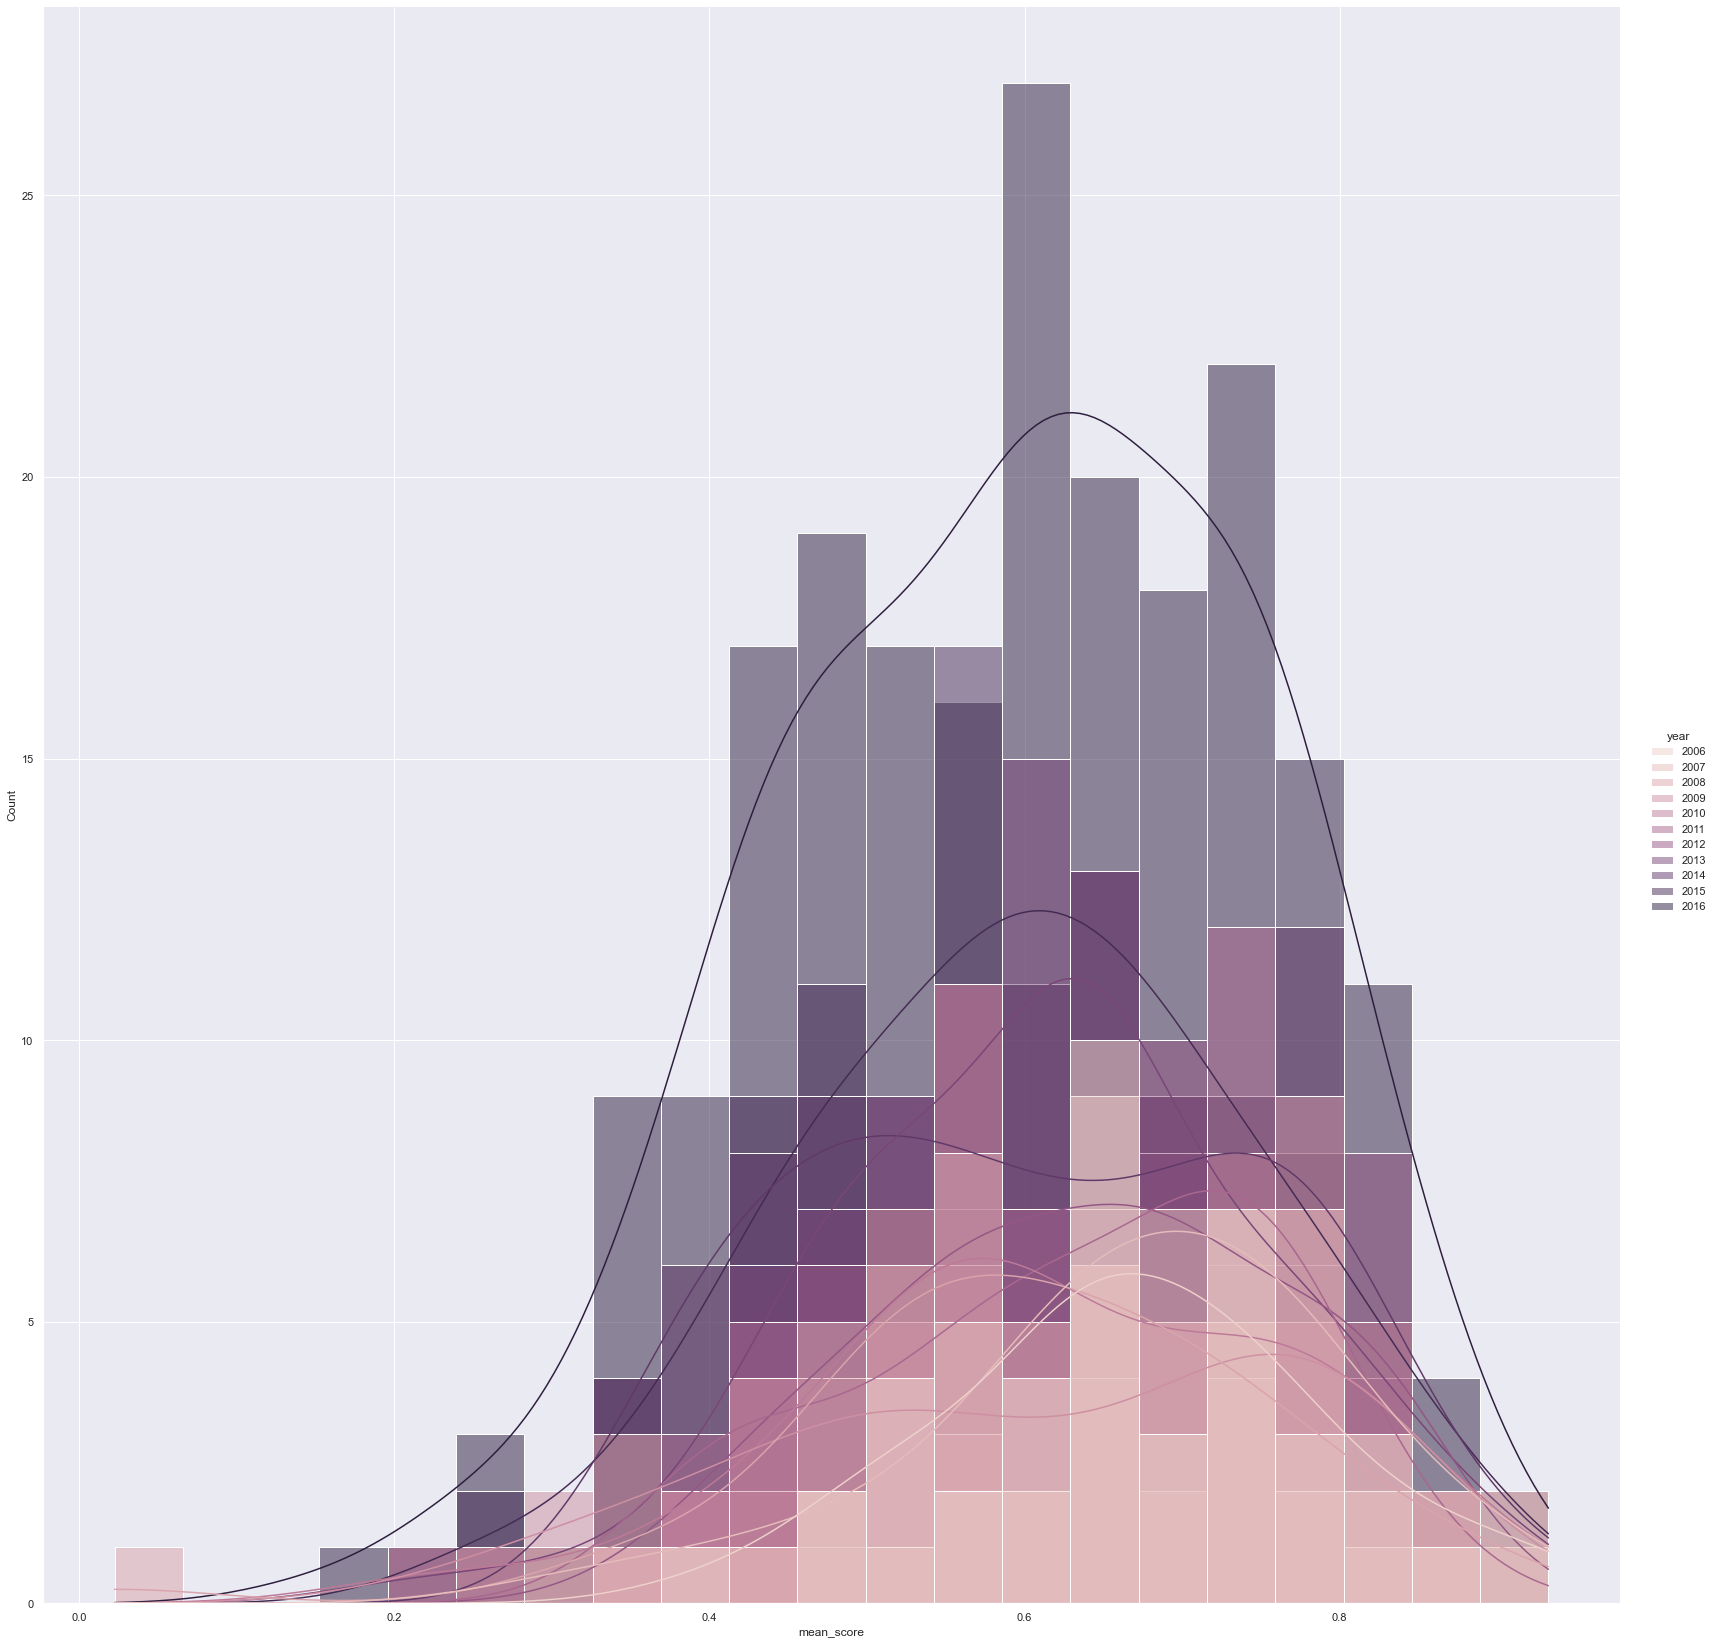

In [73]:
sns.displot(
    data=df, kind="hist", kde=True,
    x="mean_score", hue="year", height=23);